In [1]:
import torch
from transformers import AutoTokenizer, AutoModel
from Bio import SeqIO
import numpy as np
from sklearn.cluster import KMeans

In [2]:
sequences_list = list(SeqIO.parse("Data/rbcL.fasta", "fasta"))


In [3]:
sequences = [str(sequence.seq) for sequence in sequences_list[:40000]]

In [4]:
for seq_record in sequences:
    print(len(seq_record), end=" ")

907 703 919 907 703 768 804 804 804 804 804 804 801 869 634 633 798 867 894 632 613 789 802 621 800 934 780 727 677 676 632 990 718 900 837 777 769 915 956 925 951 946 945 947 947 941 942 773 773 654 942 615 819 651 883 831 792 648 936 986 696 600 718 718 773 810 780 696 696 696 812 840 852 795 894 759 756 940 624 624 624 624 889 680 680 741 889 961 655 798 716 673 873 834 907 845 876 814 809 852 719 915 899 820 888 780 963 865 925 838 963 895 877 877 876 888 905 870 876 963 963 963 963 957 963 959 905 924 899 916 899 963 963 735 735 735 735 735 742 742 742 742 742 733 742 742 742 742 742 742 742 742 742 742 742 742 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 908 919 769 820 751 870 817 654 903 925 786 735 735 735 735 735 742 742 742 742 742 742 774 774 774 774 774 774 774 774 774 774 774 742 772 936 754 688 962 672 952 952 921 808 867 904 892 912 817 801 924 792 905 901 905 837 844 887 924 906 931 884 952 915 950 836 913 910 905 912 

In [5]:
sequences_halved = []
for seq in sequences:
    half_length = len(seq) // 2
    sequences_halved.append(seq[:half_length])
sequences = np.array(sequences_halved)

In [6]:
for seq_record in sequences:
    print(len(seq_record), end=" ")

453 351 459 453 351 384 402 402 402 402 402 402 400 434 317 316 399 433 447 316 306 394 401 310 400 467 390 363 338 338 316 495 359 450 418 388 384 457 478 462 475 473 472 473 473 470 471 386 386 327 471 307 409 325 441 415 396 324 468 493 348 300 359 359 386 405 390 348 348 348 406 420 426 397 447 379 378 470 312 312 312 312 444 340 340 370 444 480 327 399 358 336 436 417 453 422 438 407 404 426 359 457 449 410 444 390 481 432 462 419 481 447 438 438 438 444 452 435 438 481 481 481 481 478 481 479 452 462 449 458 449 481 481 367 367 367 367 367 371 371 371 371 371 366 371 371 371 371 371 371 371 371 371 371 371 371 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 454 459 384 410 375 435 408 327 451 462 393 367 367 367 367 367 371 371 371 371 371 371 387 387 387 387 387 387 387 387 387 387 387 371 386 468 377 344 481 336 476 476 460 404 433 452 446 456 408 400 462 396 452 450 452 418 422 443 462 453 465 442 476 457 475 418 456 455 452 456 

In [7]:
architecture_name = "DNABERT6"

In [8]:
# from transformers import AutoConfig, AutoModel, AutoTokenizer

# # load the configuration from the JSON file
# config_path = 'DNABERT6/config.json'
# config = AutoConfig.from_pretrained(config_path)

# # load weights from the .bin file
# model = AutoModel.from_pretrained('DNABERT6/pytorch_model.bin', config=config)

# # load tokenizer
# tokenizer_config_path = "DNABERT6/tokenizer_config.json"
# special_tokens_map_path = "DNABERT6/special_tokens_map.json"

# with open(tokenizer_config_path, 'r') as tokenizer_config_file:
#     tokenizer_config = tokenizer_config_file.read()

# with open(special_tokens_map_path, 'r') as special_tokens_map_file:
#     special_tokens_map = special_tokens_map_file.read()

# tokenizer = AutoTokenizer.from_pretrained(
#     'DNABERT6/', 
#     tokenizer_config=tokenizer_config,
#     special_tokens_map=special_tokens_map,
#     use_fast=True
# )

# model.eval()


In [9]:
# print(type(tokenizer))
# print(tokenizer('AAAAAA'))
# print(tokenizer('AAAATA'))

In [10]:
# from DNABERT REPO
# https://github.com/jerryji1993/DNABERT/tree/master
def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space

    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

In [11]:
k_mer_seqs = []
for seq in sequences:
    seqt = seq2kmer(seq, 6)
    k_mer_seqs.append(seqt)

In [12]:
len(k_mer_seqs)

40000

In [13]:
print(k_mer_seqs[0])


TTTTTT TTTTTT TTTTTT TTTTTT TTTTTT TTTTTT TTTTTT TTTTTT TTTTTC TTTTCG TTTCGA TTCGAA TCGAAC CGAACT GAACTT AACTTG ACTTGA CTTGAT TTGATC TGATCG GATCGC ATCGCA TCGCAT CGCATC GCATCC CATCCA ATCCAA TCCAAA CCAAAA CAAAAA AAAAAA AAAAAA AAAAAT AAAATC AAATCT AATCTT ATCTTC TCTTCG CTTCGA TTCGAT TCGATA CGATAG GATAGC ATAGCA TAGCAC AGCACG GCACGT CACGTG ACGTGG CGTGGA GTGGAT TGGATC GGATCG GATCGG ATCGGT TCGGTT CGGTTA GGTTAA GTTAAT TTAATT TAATTC AATTCA ATTCAA TTCAAT TCAATA CAATAA AATAAG ATAAGA TAAGAA AAGAAA AGAAAT GAAATG AAATGG AATGGG ATGGGA TGGGAG GGGAGT GGAGTT GAGTTC AGTTCG GTTCGC TTCGCG TCGCGC CGCGCT GCGCTC CGCTCG GCTCGA CTCGAT TCGATT CGATTT GATTTC ATTTCG TTTCGT TTCGTT TCGTTG CGTTGG GTTGGT TTGGTA TGGTAC GGTACC GTACCG TACCGT ACCGTC CCGTCC CGTCCA GTCCAA TCCAAC CCAACC CAACCG AACCGA ACCGAA CCGAAT CGAATG GAATGC AATGCA ATGCAA TGCAAT GCAATT CAATTC AATTCA ATTCAA TTCAAT TCAATA CAATAG AATAGT ATAGTT TAGTTT AGTTTC GTTTCC TTTCCT TTCCTT TCCTTA CCTTAT CTTATG TTATGC TATGCT ATGCTT TGCTTA GCTTAT CTTATG TTATGC TATGCA ATGCAT

In [14]:
save_freq = 4000
batch_size = 400
data_size = len(k_mer_seqs)
file_path = 'embeddings_full.csv'

# embeddings_list = []

# for i in range(0, data_size, batch_size):
#     tokenized_sequences = tokenizer(k_mer_seqs[i:i + batch_size], padding=True, truncation=True, return_tensors='pt')

#     with torch.no_grad():
#         outputs = model(**tokenized_sequences)

#     embeddings_list.append(outputs.last_hidden_state[:, 0, :])

#     if (i + batch_size) % save_freq == 0:

#         embeddings = torch.cat(embeddings_list, dim=0)
#         embeddings_np = embeddings.detach().numpy()

#         with open(file_path, 'a') as file:
#             np.savetxt(file, embeddings_np, delimiter=',')

#         del embeddings, embeddings_np
#         embeddings_list = []

#         print(f"Saved {i + batch_size} embeddings")
    
#     print(f"{i + batch_size} is done")


In [15]:
embeddings = np.genfromtxt('embeddings_full.csv', delimiter=',')

In [16]:
embeddings.shape

(40000, 768)

In [17]:

def KMeansOnEmbeddings(embeddings, n_clusters, seed=42, normalize=True):

    # define Kmeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1500)
    
    # run Kmeans
    cluster_labels = kmeans.fit_predict(embeddings)

    # count labels to see if the clusters look okay ish
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

    for label, count in zip(unique_labels, label_counts):
        print(f"Label {label}: Count {count}")

    return cluster_labels, unique_labels



In [18]:
from sklearn.metrics import pairwise_distances

In [19]:
def pairWiseCrossValidation(embeddings, sequences):
    sum_means = []
    for k in range(3, 50):
        cluster_labels, unique_labels = KMeansOnEmbeddings(embeddings, k)
        means = []
        for ind in unique_labels:
            cluster_sequences = [sequences[i] for i, label in enumerate(cluster_labels) if label == unique_labels[ind]]
            
            means.append(np.mean(pairwise_distances(cluster_sequences, metric="cosine")))
        sum_means.append(np.mean(np.array(means)))
    return np.argmin(sum_means) + 3


In [20]:
from helper import getData

In [21]:
sequences_flat = getData("Data/rbcL_ordinal_encoding_full.txt", 50000)

In [22]:
num_clusters = pairWiseCrossValidation(embeddings, sequences_flat)

Label 0: Count 6383
Label 1: Count 21298
Label 2: Count 12319
Label 0: Count 12898
Label 1: Count 7268
Label 2: Count 6425
Label 3: Count 13409
Label 0: Count 13163
Label 1: Count 7256
Label 2: Count 6643
Label 3: Count 8017
Label 4: Count 4921
Label 0: Count 7393
Label 1: Count 4940
Label 2: Count 6063
Label 3: Count 7102
Label 4: Count 6292
Label 5: Count 8210
Label 0: Count 6906
Label 1: Count 7459
Label 2: Count 6068
Label 3: Count 3793
Label 4: Count 4956
Label 5: Count 6354
Label 6: Count 4464
Label 0: Count 3428
Label 1: Count 5823
Label 2: Count 6332
Label 3: Count 3751
Label 4: Count 7176
Label 5: Count 1718
Label 6: Count 7374
Label 7: Count 4398
Label 0: Count 3075
Label 1: Count 5957
Label 2: Count 7392
Label 3: Count 6316
Label 4: Count 3430
Label 5: Count 4400
Label 6: Count 3726
Label 7: Count 1715
Label 8: Count 3989
Label 0: Count 4480
Label 1: Count 3757
Label 2: Count 3900
Label 3: Count 4978
Label 4: Count 2411
Label 5: Count 4016
Label 6: Count 5128
Label 7: Count 

In [23]:
print(num_clusters)

42


In [19]:
num_clusters = 42

In [20]:
cluster_labels, unique_labels = KMeansOnEmbeddings(embeddings, num_clusters)

Label 0: Count 2328
Label 1: Count 542
Label 2: Count 1216
Label 3: Count 600
Label 4: Count 814
Label 5: Count 227
Label 6: Count 1338
Label 7: Count 860
Label 8: Count 506
Label 9: Count 719
Label 10: Count 2840
Label 11: Count 826
Label 12: Count 1281
Label 13: Count 1500
Label 14: Count 1024
Label 15: Count 1217
Label 16: Count 2290
Label 17: Count 540
Label 18: Count 801
Label 19: Count 814
Label 20: Count 498
Label 21: Count 590
Label 22: Count 1108
Label 23: Count 834
Label 24: Count 793
Label 25: Count 1031
Label 26: Count 410
Label 27: Count 770
Label 28: Count 678
Label 29: Count 990
Label 30: Count 903
Label 31: Count 481
Label 32: Count 850
Label 33: Count 741
Label 34: Count 829
Label 35: Count 1040
Label 36: Count 1164
Label 37: Count 240
Label 38: Count 588
Label 39: Count 731
Label 40: Count 1300
Label 41: Count 1148


In [21]:
from helper import *

In [26]:
def empty_decode(seq):
    return seq
def decodeSequences(architecture_name, sequences_list, decoding_function, unique_labels, cluster_labels):
    for cluster_label in unique_labels:
        cluster_sequences = [sequences_list[i] for i, label in enumerate(cluster_labels) if label == cluster_label]
        
        decoded_sequences = []
        for seq in cluster_sequences:
            decoded_seq = decoding_function(seq)
            decoded_sequences.append(decoded_seq)
        
        with open(f'clusters/{architecture_name}/cluster_{cluster_label}.fasta', 'w') as output_file:
            for idx, sequence in enumerate(decoded_sequences):
                output_file.write(f'>Seq_{idx}\n{sequence}\n')

decodeSequences(architecture_name, sequences, empty_decode, unique_labels, cluster_labels)


In [27]:
type(unique_labels)

numpy.ndarray

In [28]:
runClustalRange(architecture_name, 0, num_clusters, unique_labels, True)

Using 16 threads
Read 2328 sequences (type: DNA) from clusters/DNABERT6/cluster_0.fasta
Using 125 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 2328 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 283250)
Ktuple-distance calculation progress: 7 % (22643 out of 283250)
Ktuple-distance calculation progress: 10 % (28411 out of 283250)
Ktuple-distance calculation progress: 11 % (33518 out of 283250)
Ktuple-distance calculation progress: 12 % (35109 out of 283250)
Ktuple-distance calculation progress: 13 % (37088 out of 283250)
Ktuple-distance calculation progress: 14 % (41339 out of 283250)
Ktuple-distance calculation progress: 15 % (42571 out of 283250)
Ktuple-distance calculation progress: 16 % (46734 out of 283250)
Ktuple-distance calculation progress: 17 % (49697 out of 283250)
Ktuple-distance calculation progress: 18 % (51760 out of 283250)
Ktuple-distance calculation progress: 22 % (63083 

In [22]:
gap_percentages = evaluateGapsInRange(architecture_name, 0, num_clusters, unique_labels)


clustal/DNABERT6/cluster_0.clustal
Percentage of gaps in the alignment for cluster 0: 66.75%
clustal/DNABERT6/cluster_1.clustal
Percentage of gaps in the alignment for cluster 1: 66.36%
clustal/DNABERT6/cluster_2.clustal
Percentage of gaps in the alignment for cluster 2: 57.48%
clustal/DNABERT6/cluster_3.clustal
Percentage of gaps in the alignment for cluster 3: 62.46%
clustal/DNABERT6/cluster_4.clustal
Percentage of gaps in the alignment for cluster 4: 61.05%
clustal/DNABERT6/cluster_5.clustal
Percentage of gaps in the alignment for cluster 5: 52.82%
clustal/DNABERT6/cluster_6.clustal
Percentage of gaps in the alignment for cluster 6: 63.93%
clustal/DNABERT6/cluster_7.clustal
Percentage of gaps in the alignment for cluster 7: 36.33%
clustal/DNABERT6/cluster_8.clustal
Percentage of gaps in the alignment for cluster 8: 53.70%
clustal/DNABERT6/cluster_9.clustal
Percentage of gaps in the alignment for cluster 9: 61.02%
clustal/DNABERT6/cluster_10.clustal
Percentage of gaps in the alignmen

In [30]:
print(countPercentageLowerThan(gap_percentages, 20))


0


Plot for cluster 0


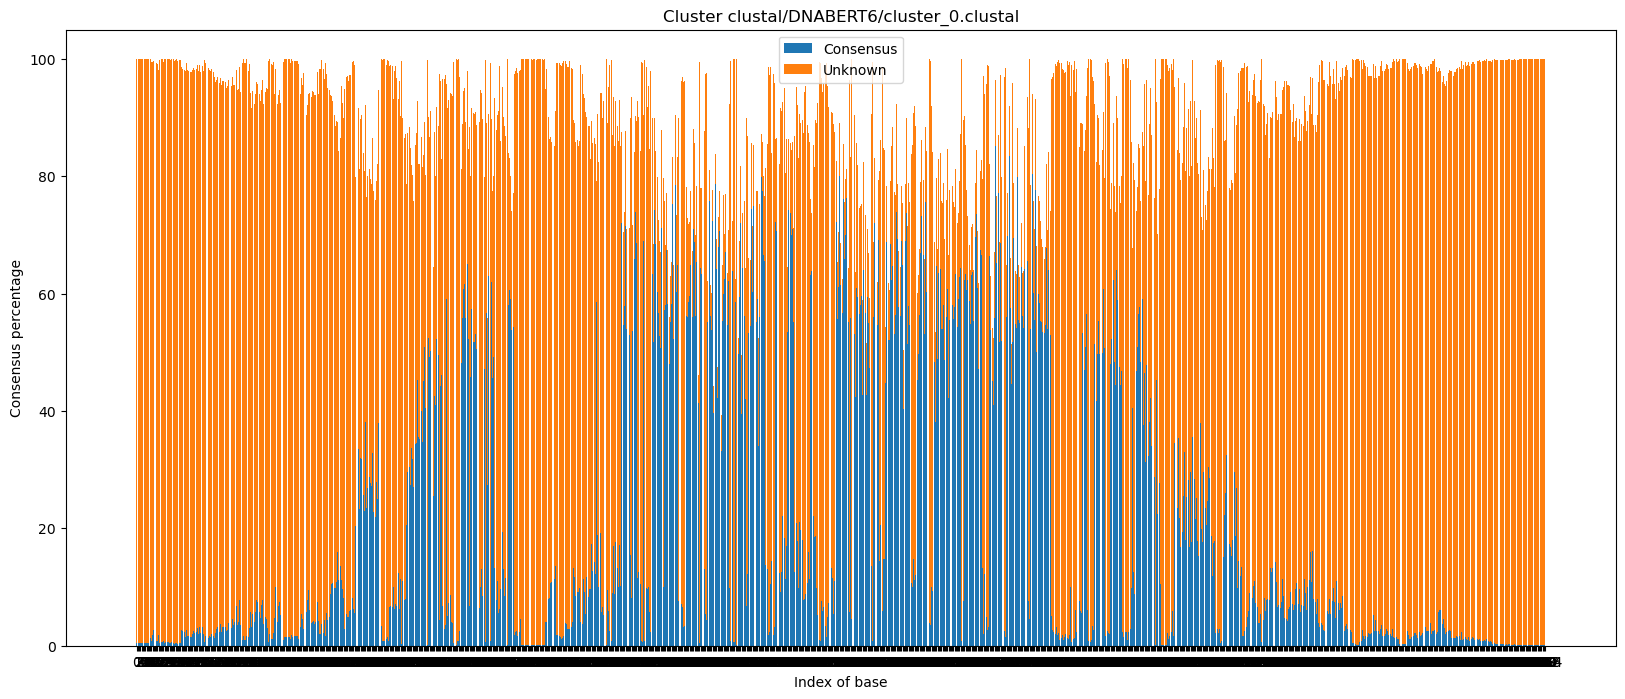

Plot for cluster 1


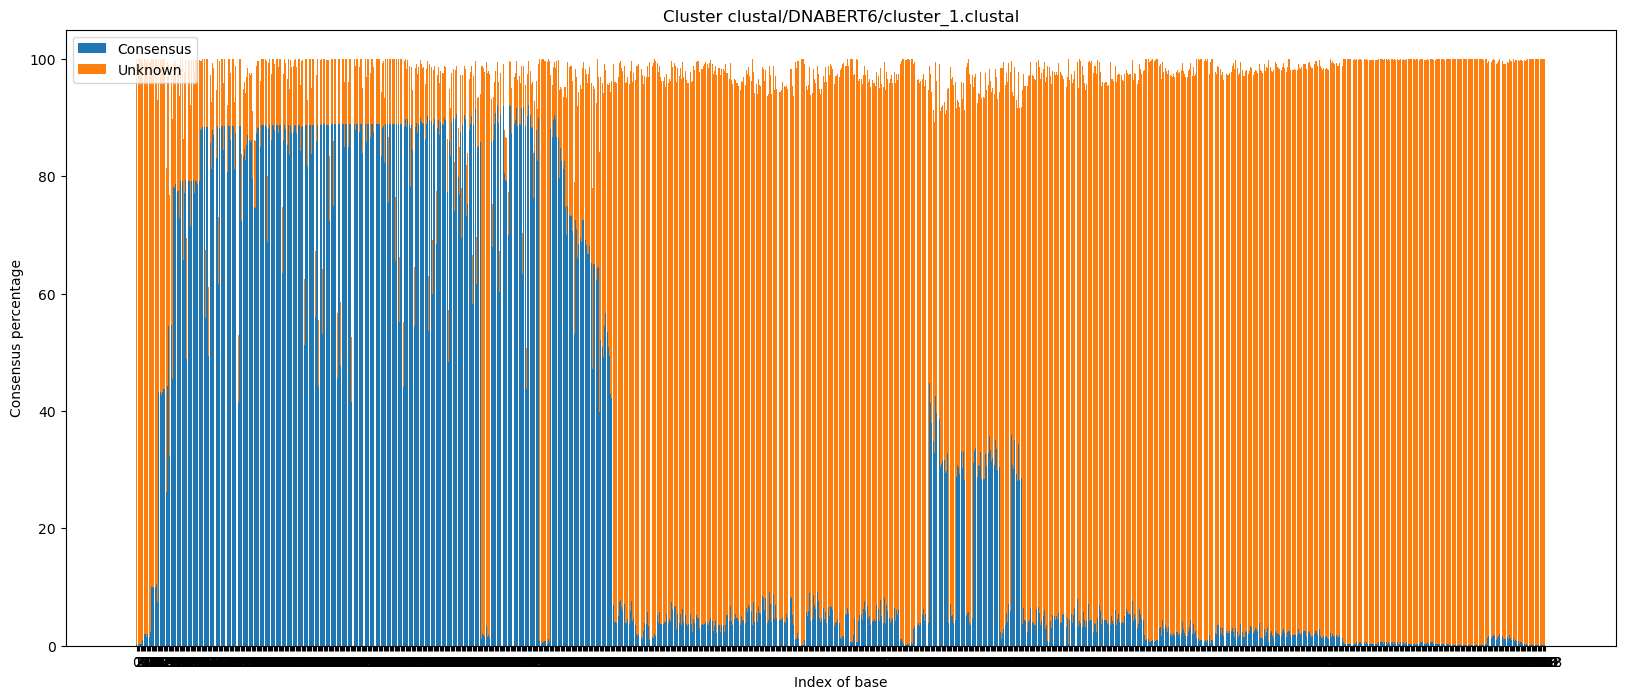

Plot for cluster 2


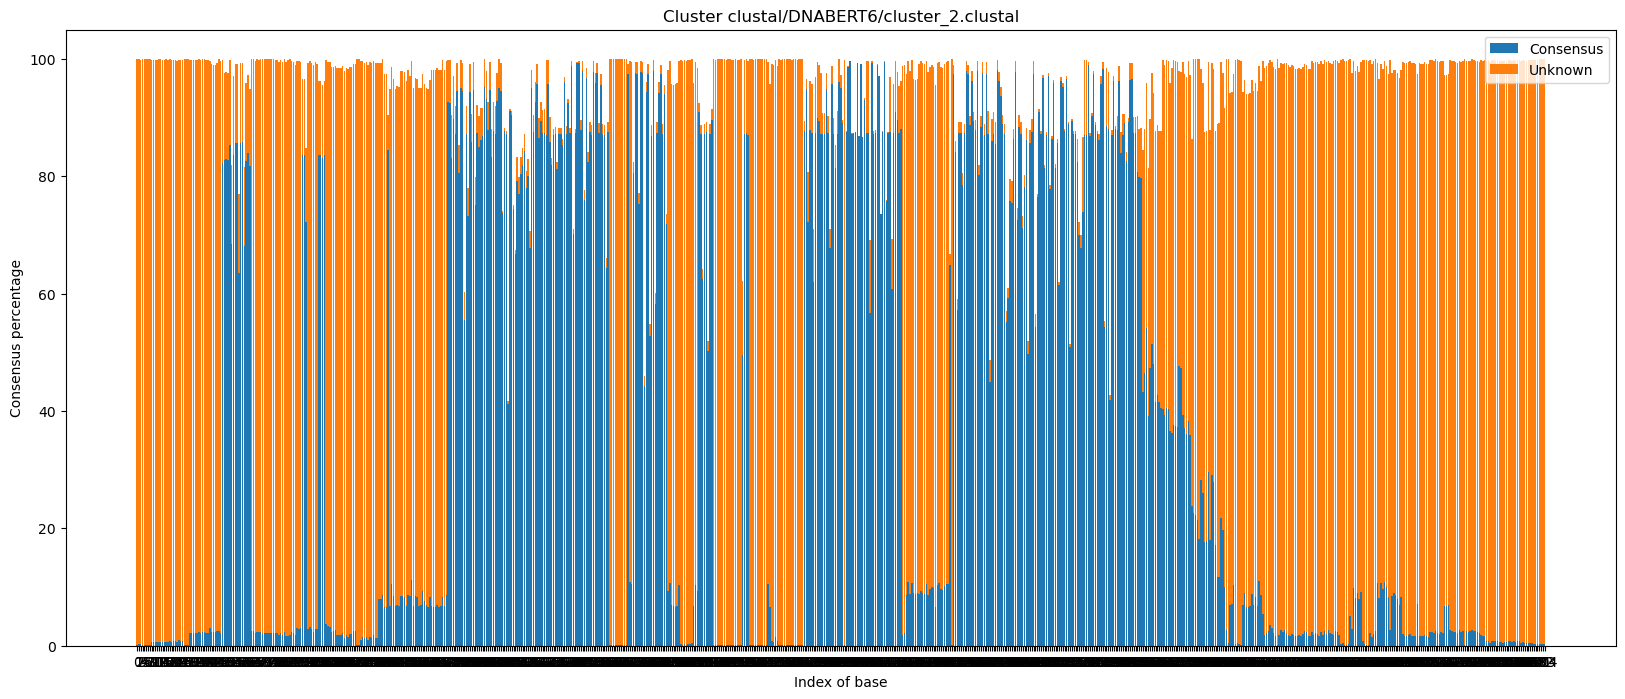

Plot for cluster 3


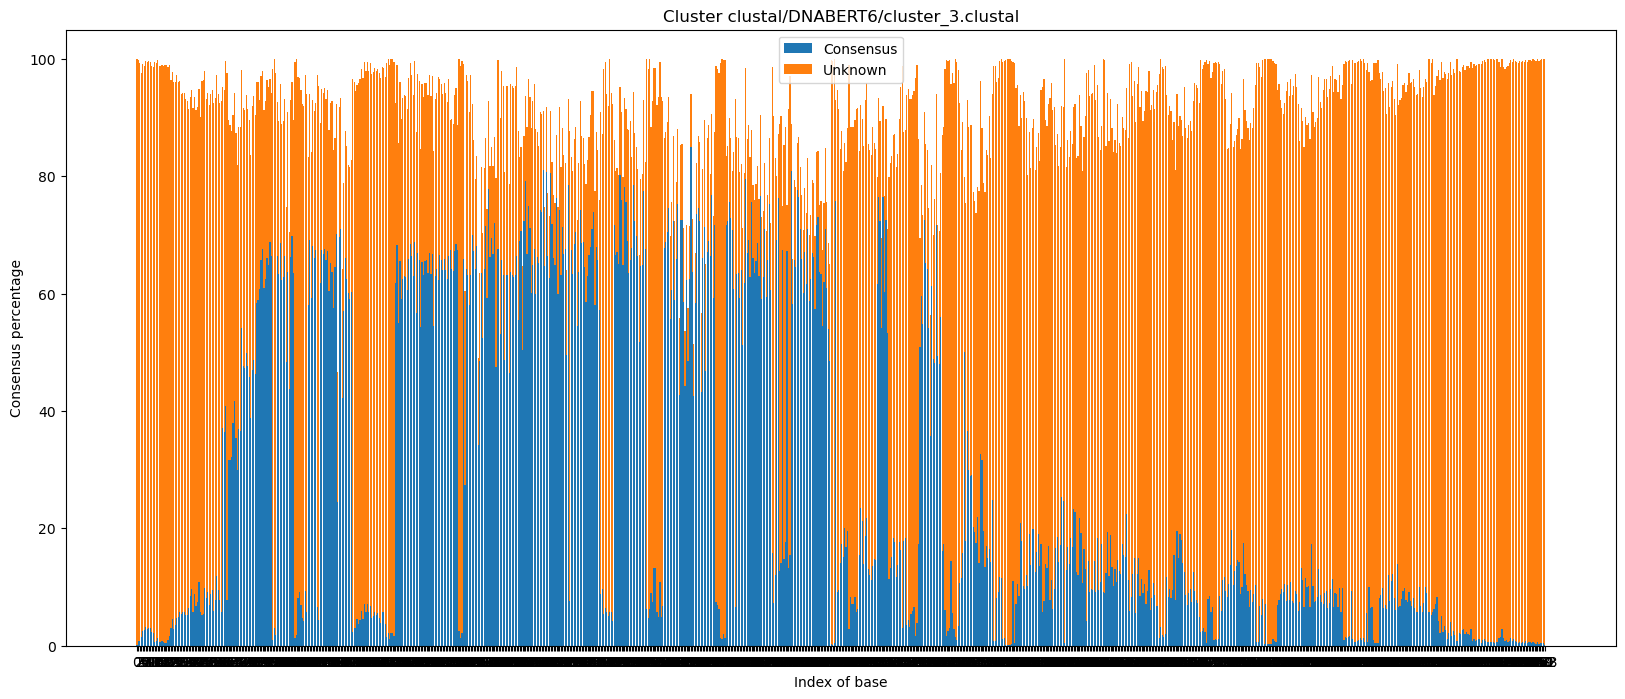

Plot for cluster 4


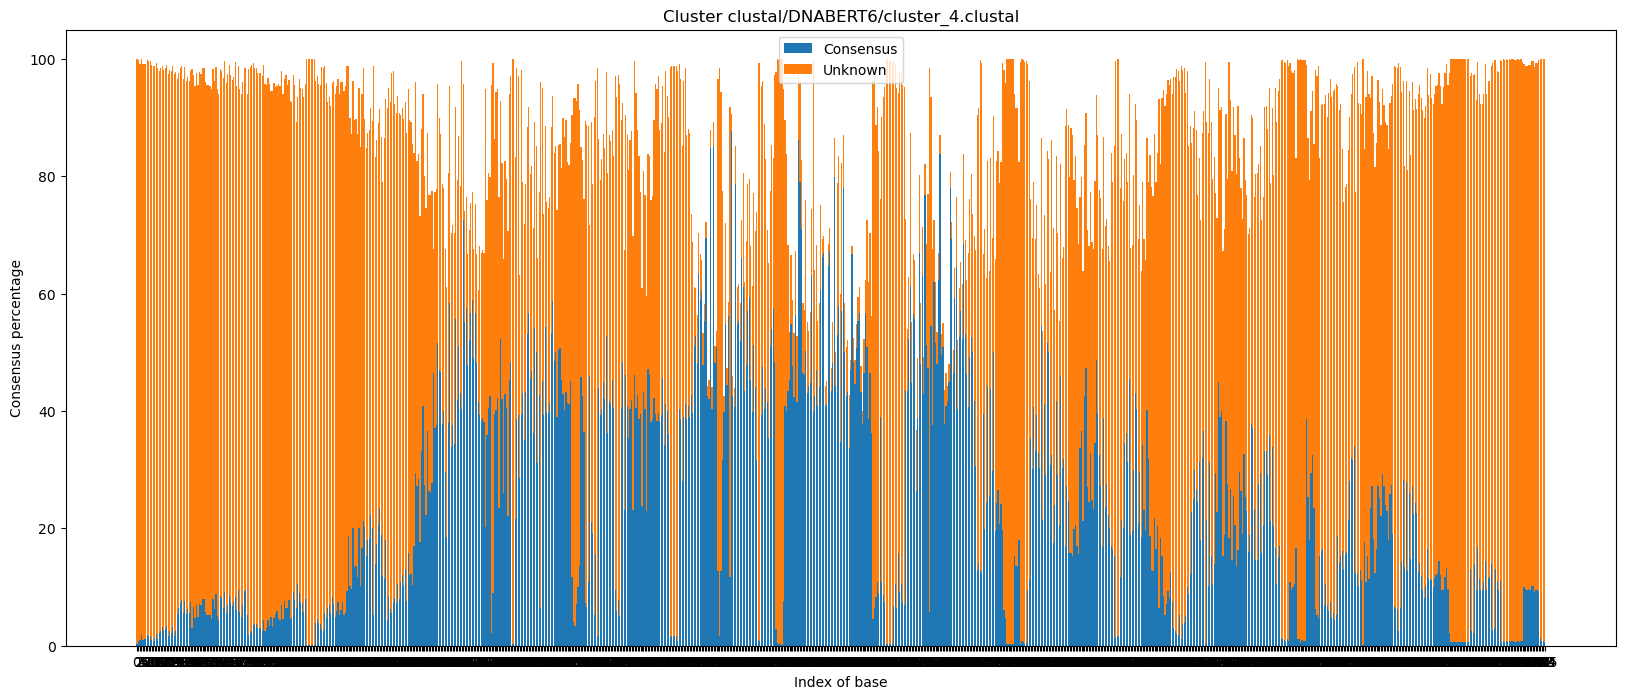

Plot for cluster 5


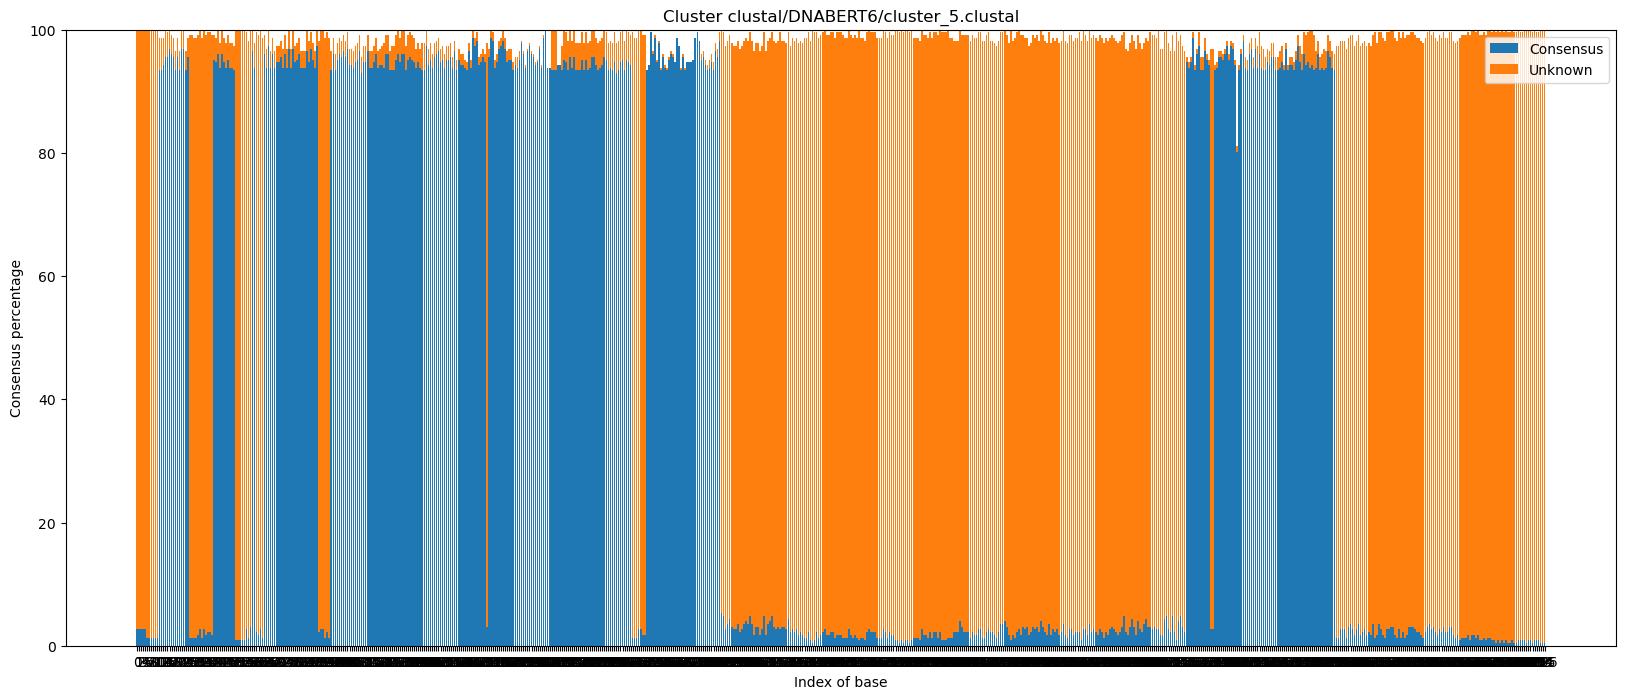

Plot for cluster 6


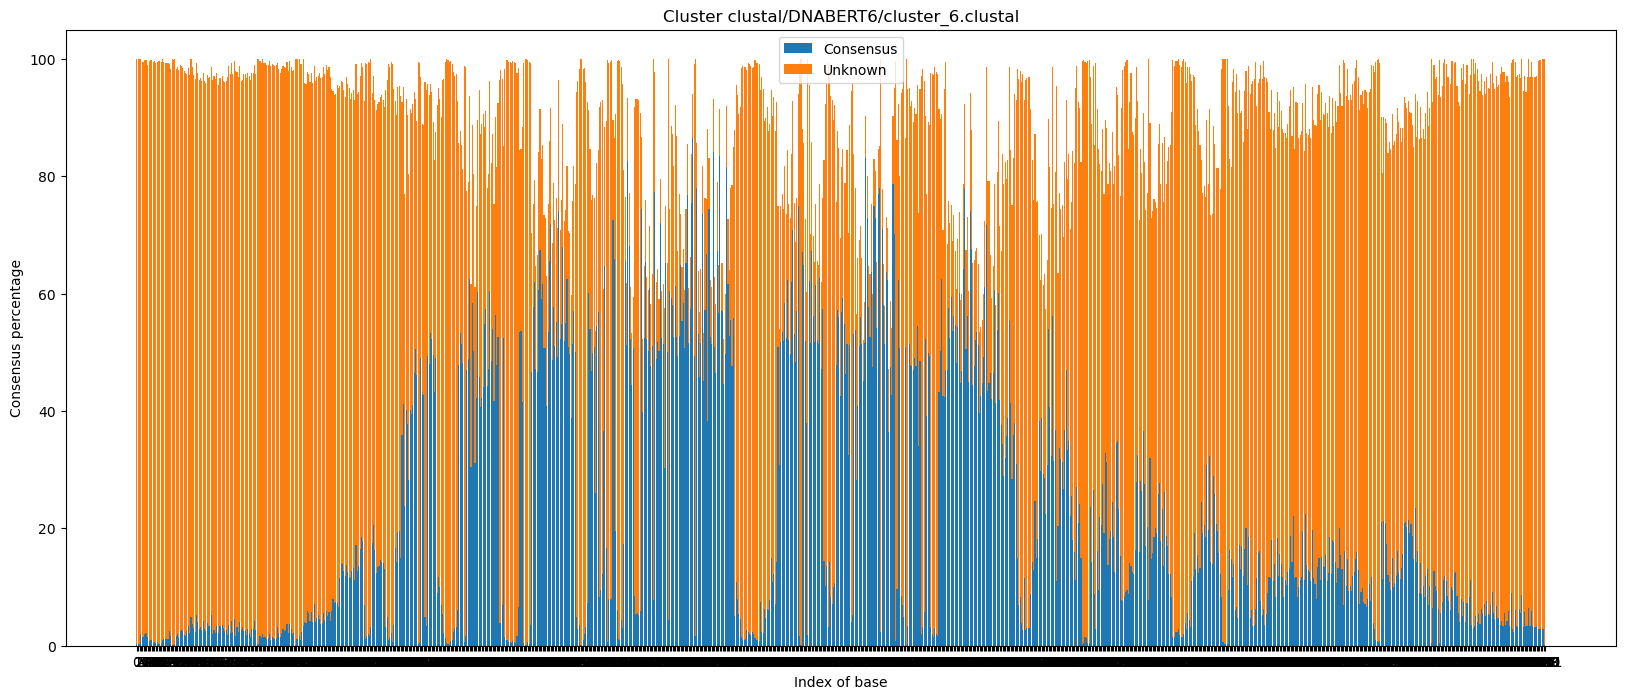

Plot for cluster 7


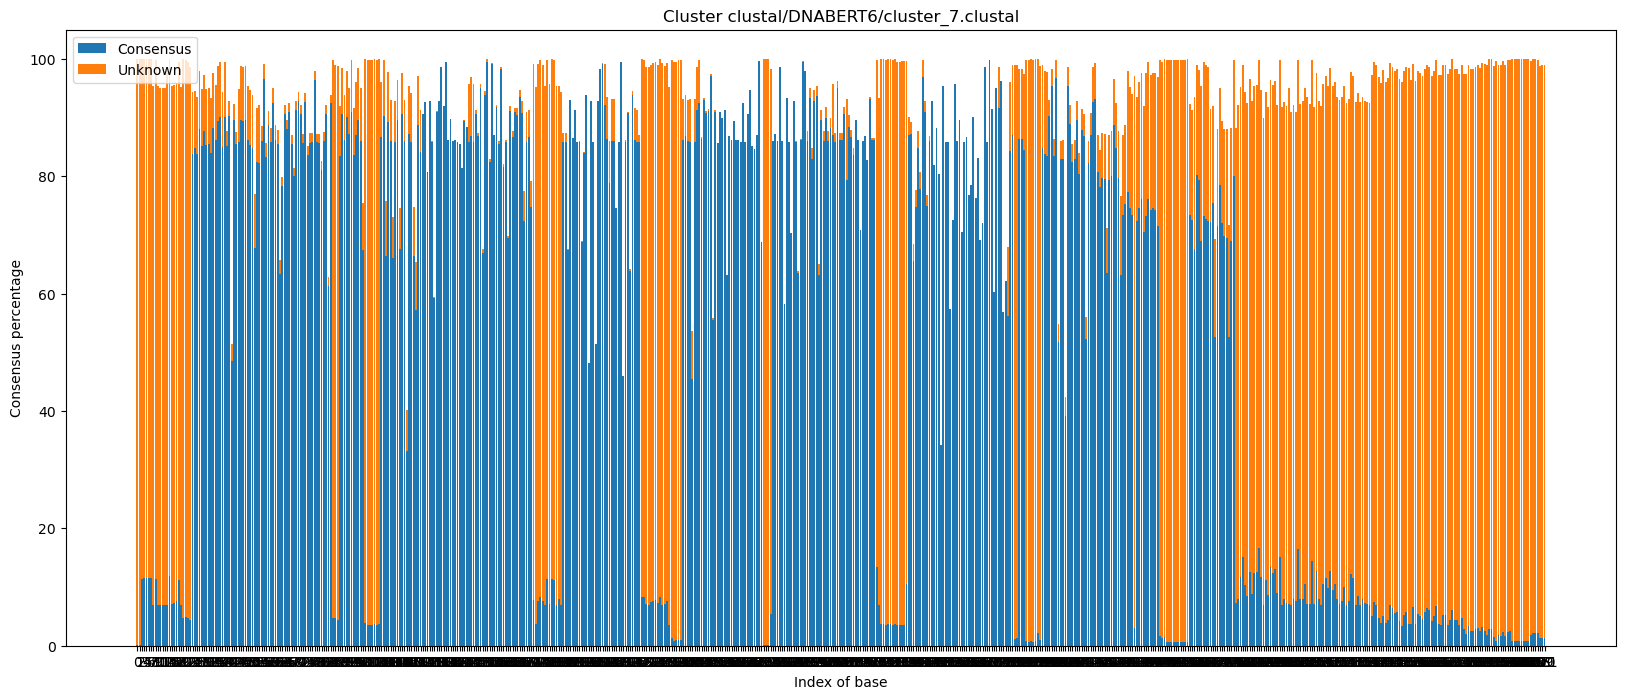

Plot for cluster 8


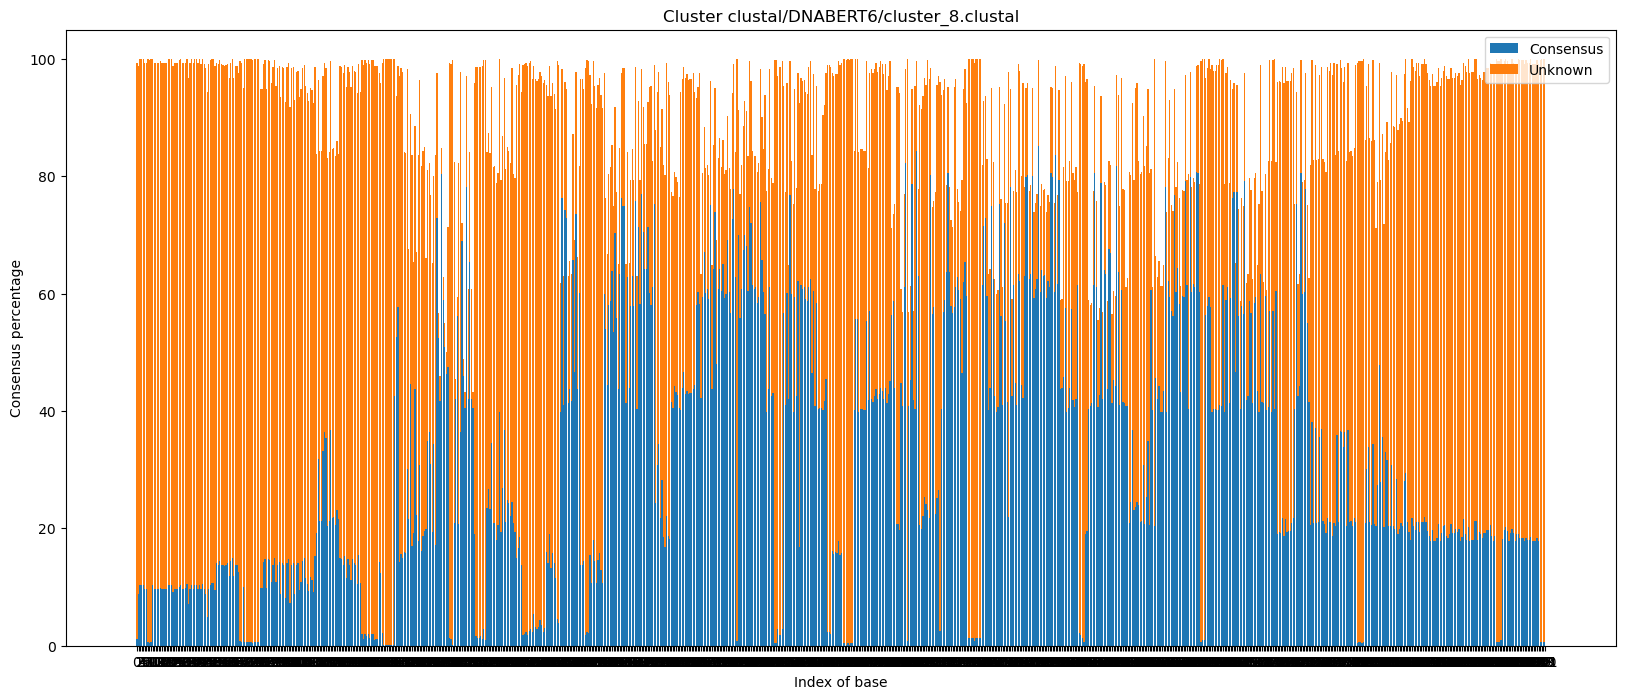

Plot for cluster 9


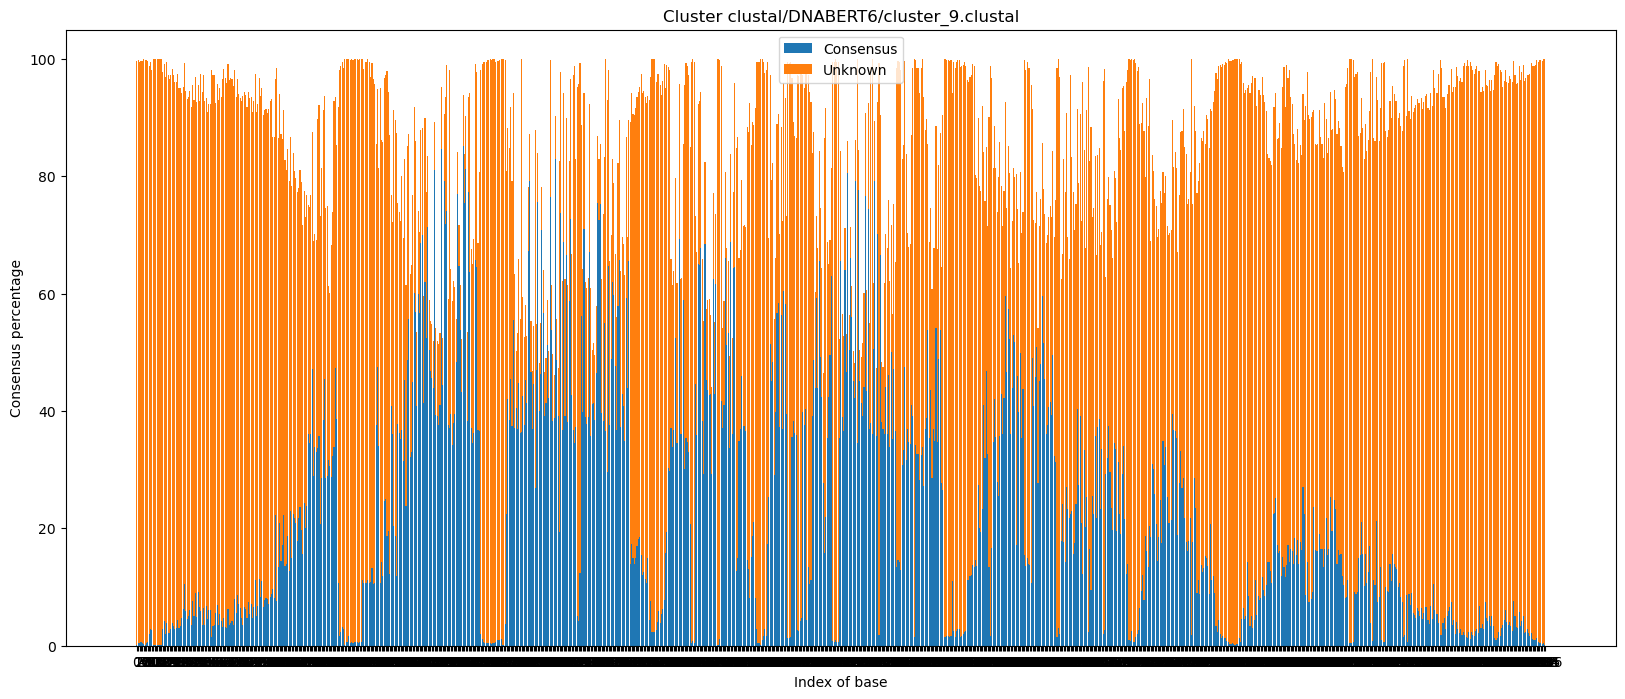

Plot for cluster 10


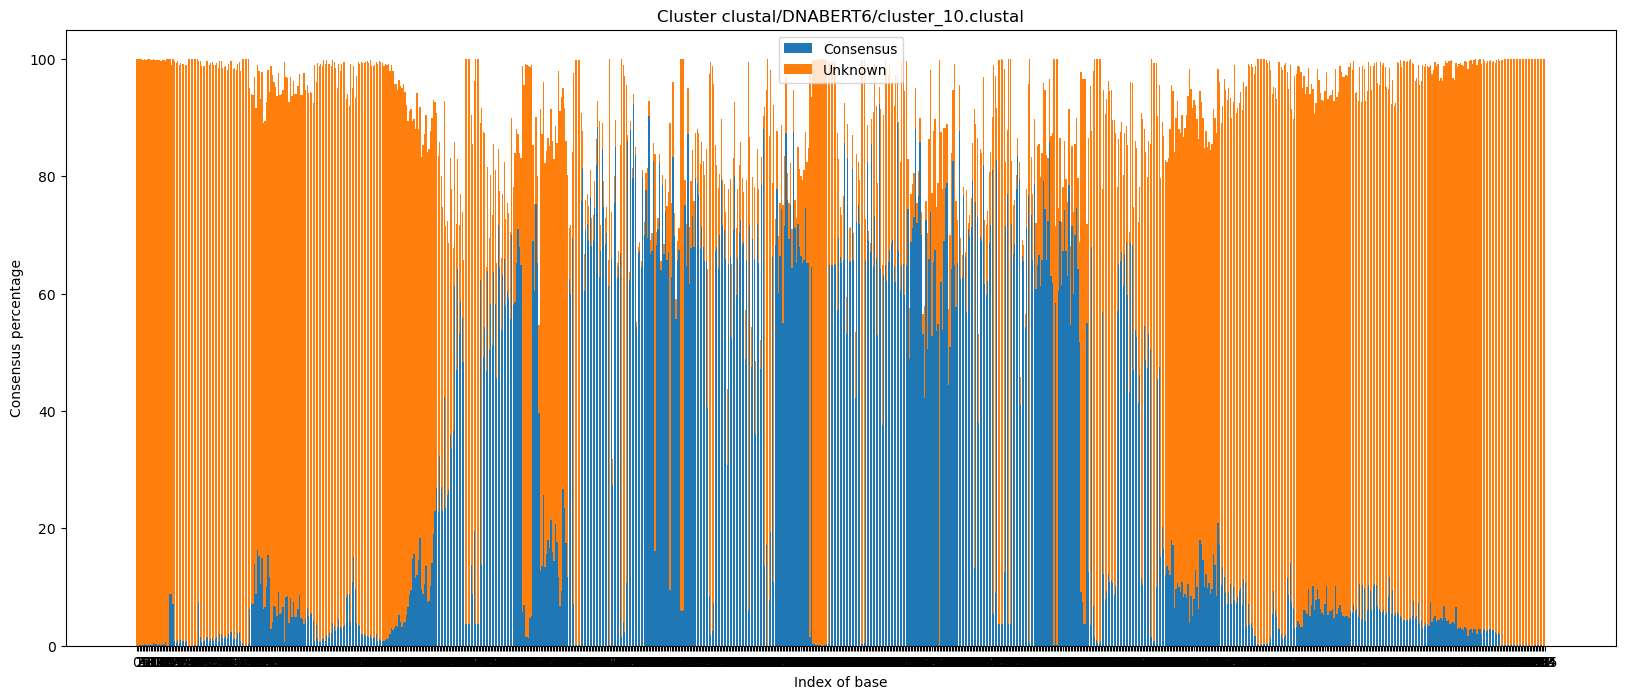

Plot for cluster 11


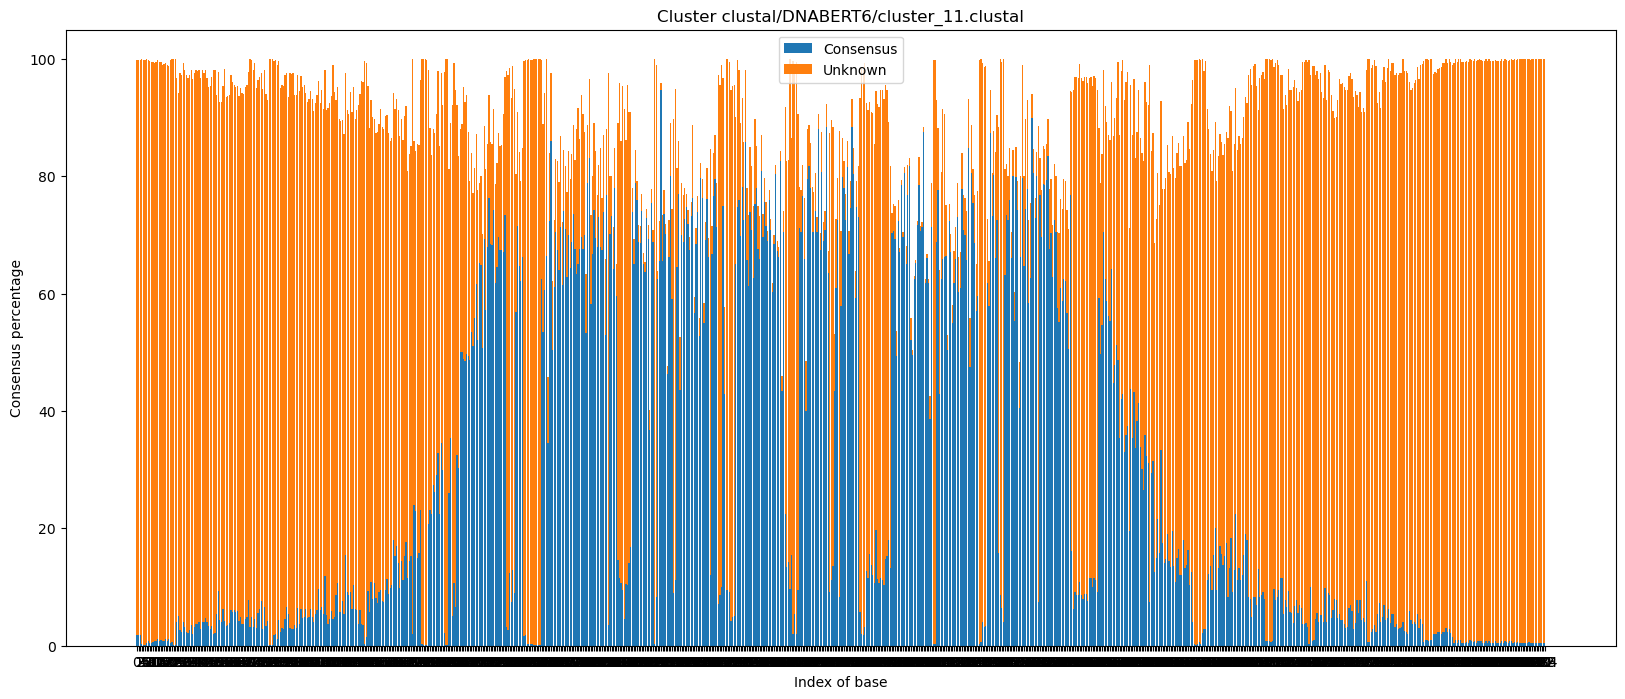

Plot for cluster 12


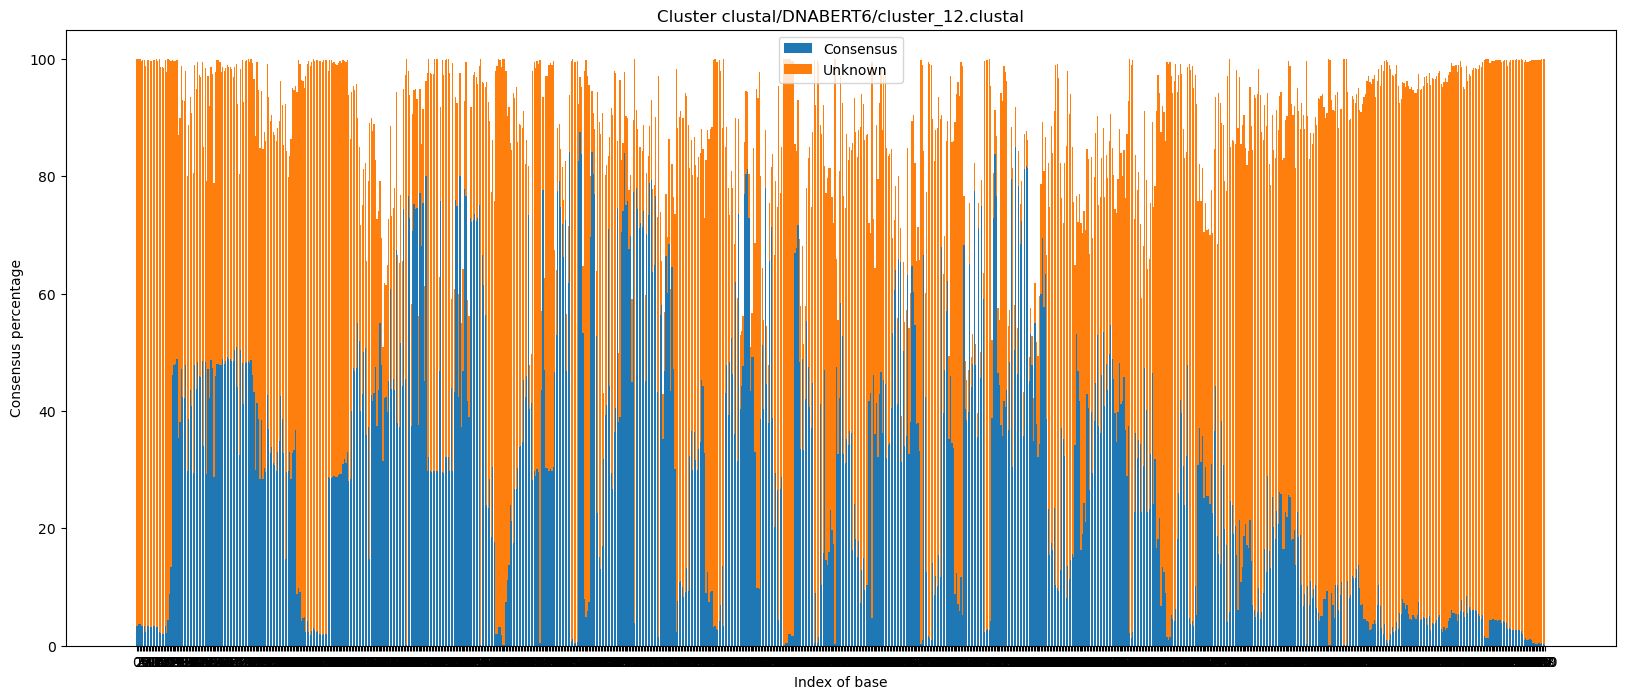

Plot for cluster 13


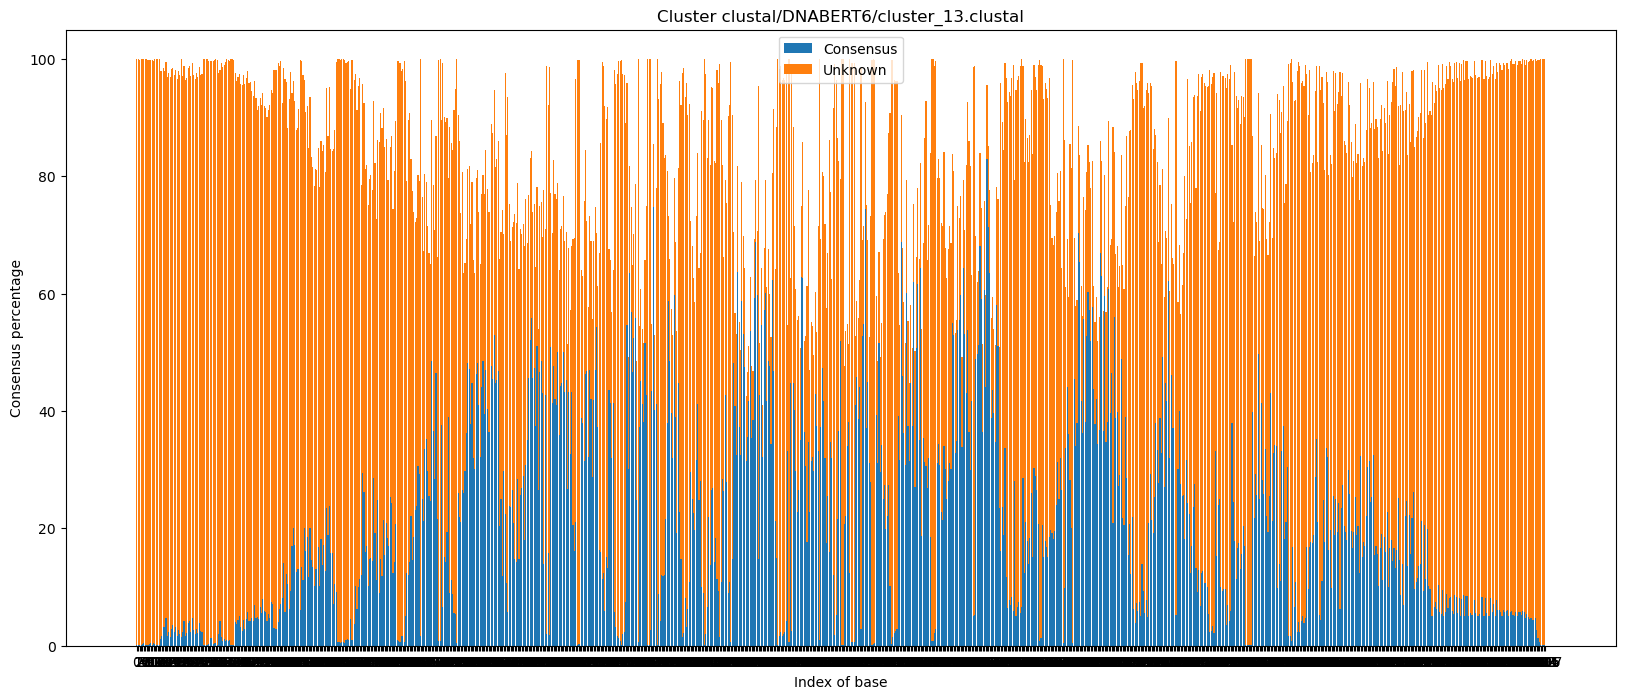

Plot for cluster 14


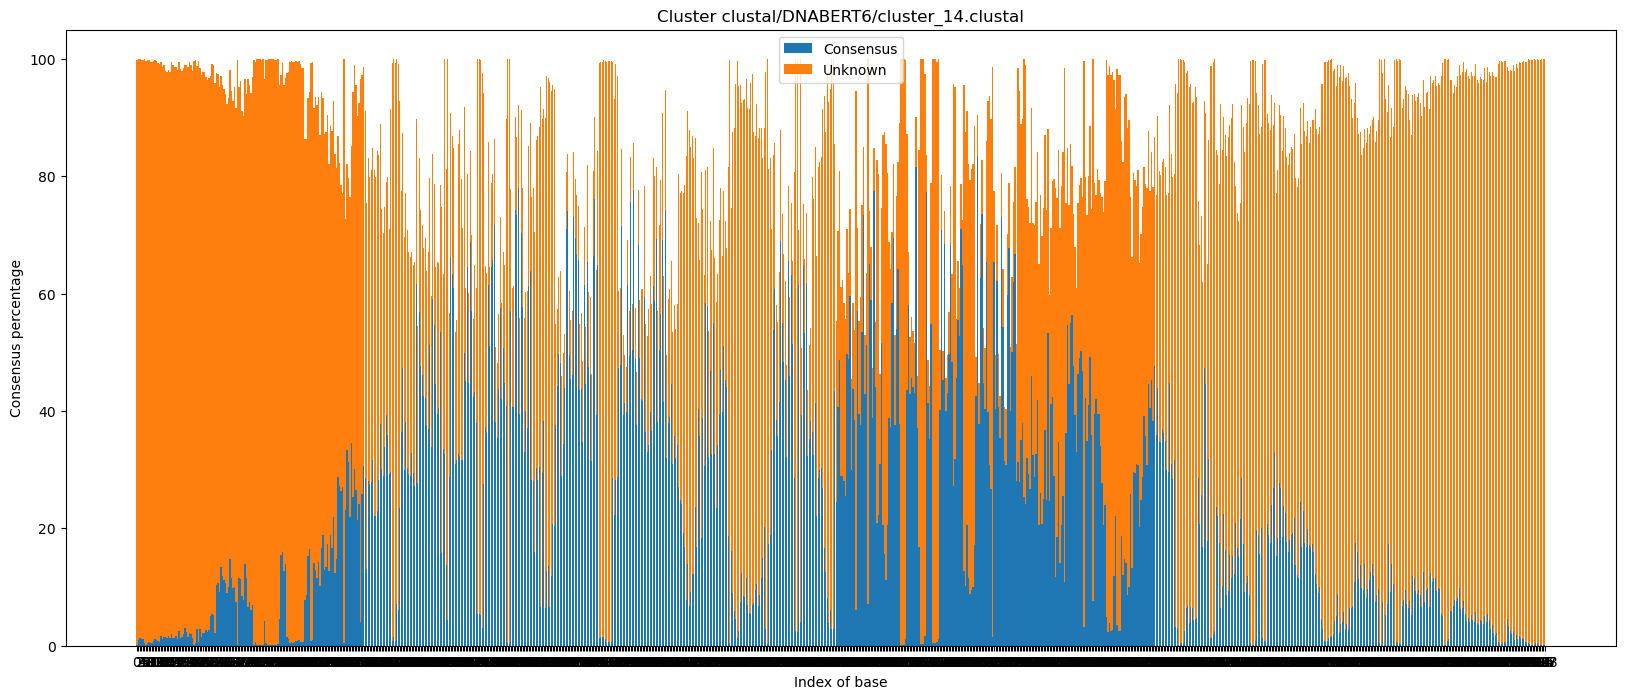

Plot for cluster 15


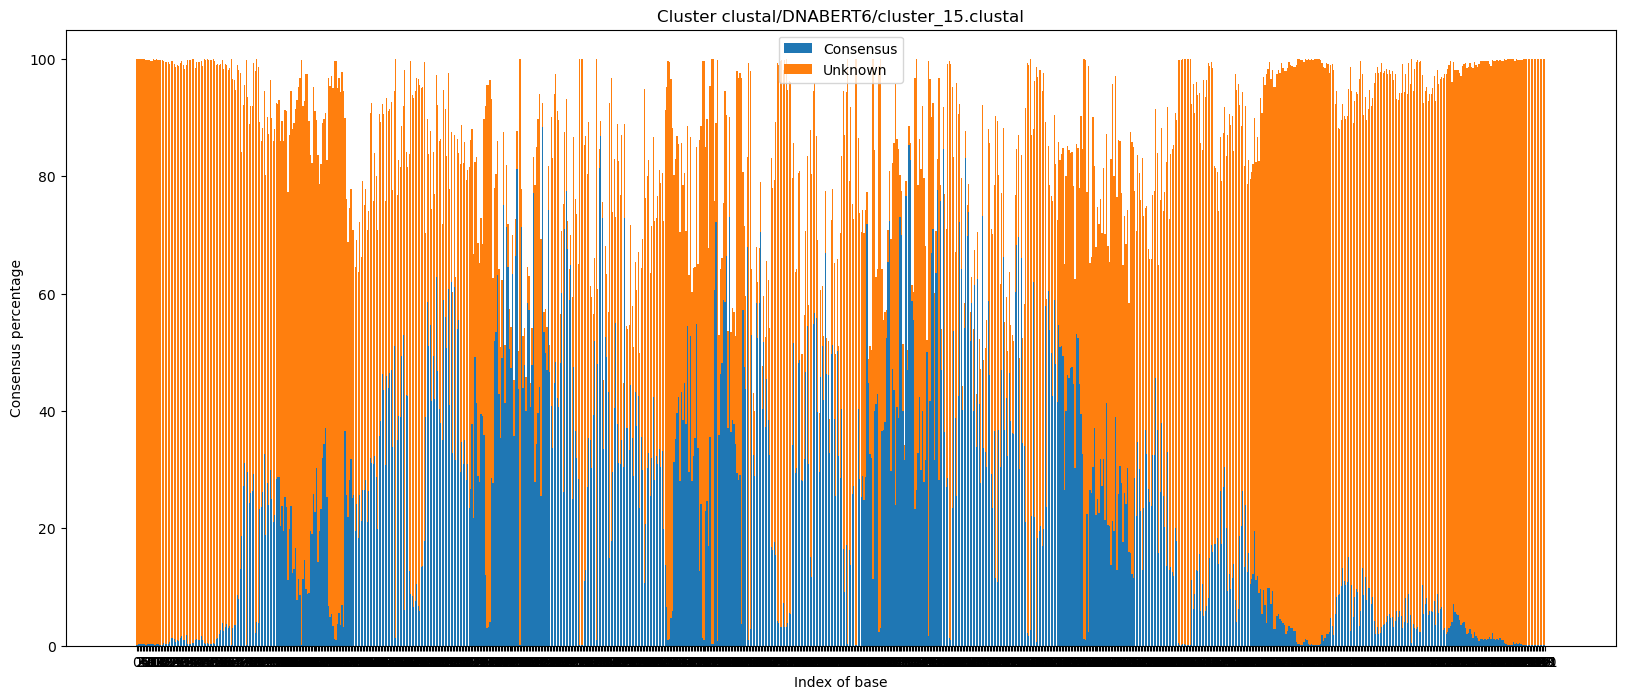

Plot for cluster 16


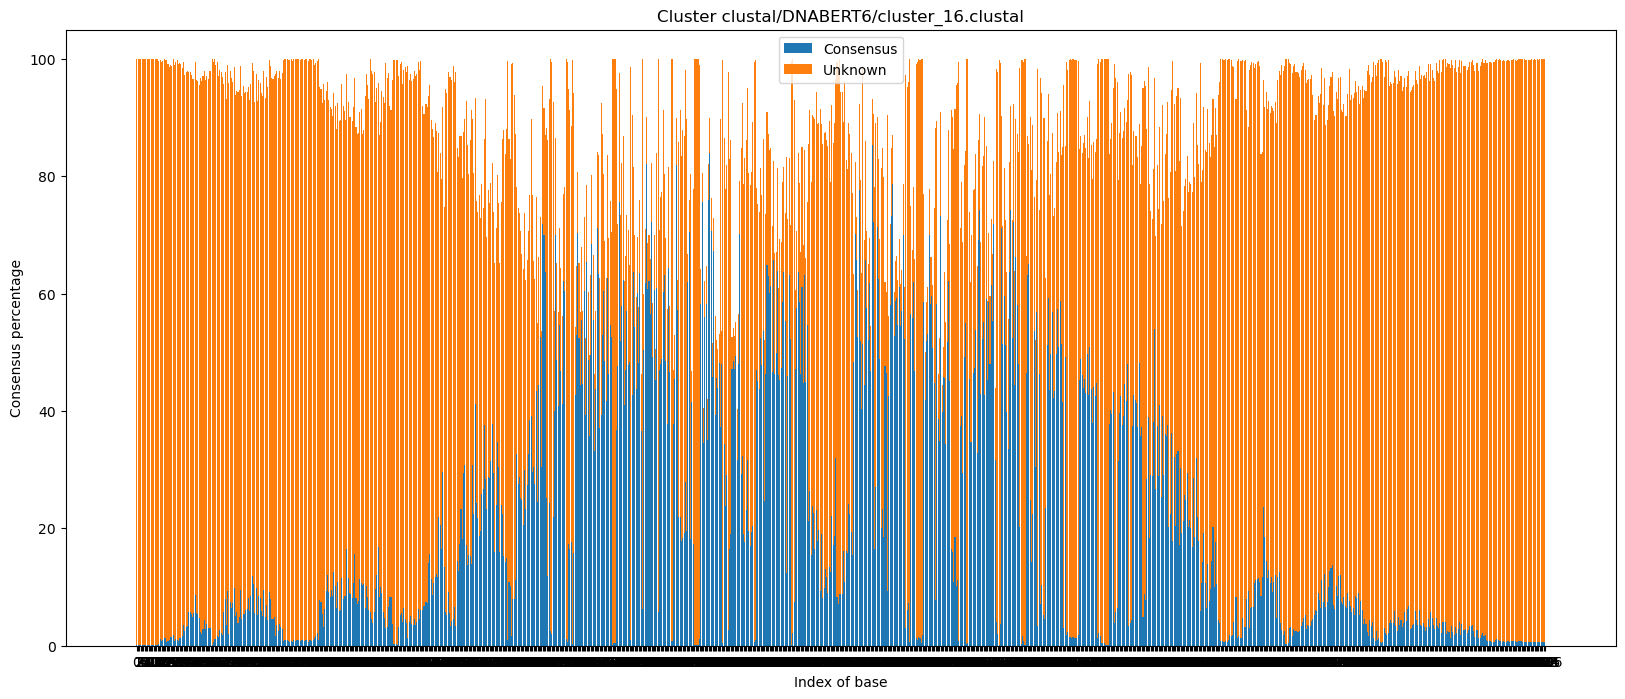

Plot for cluster 17


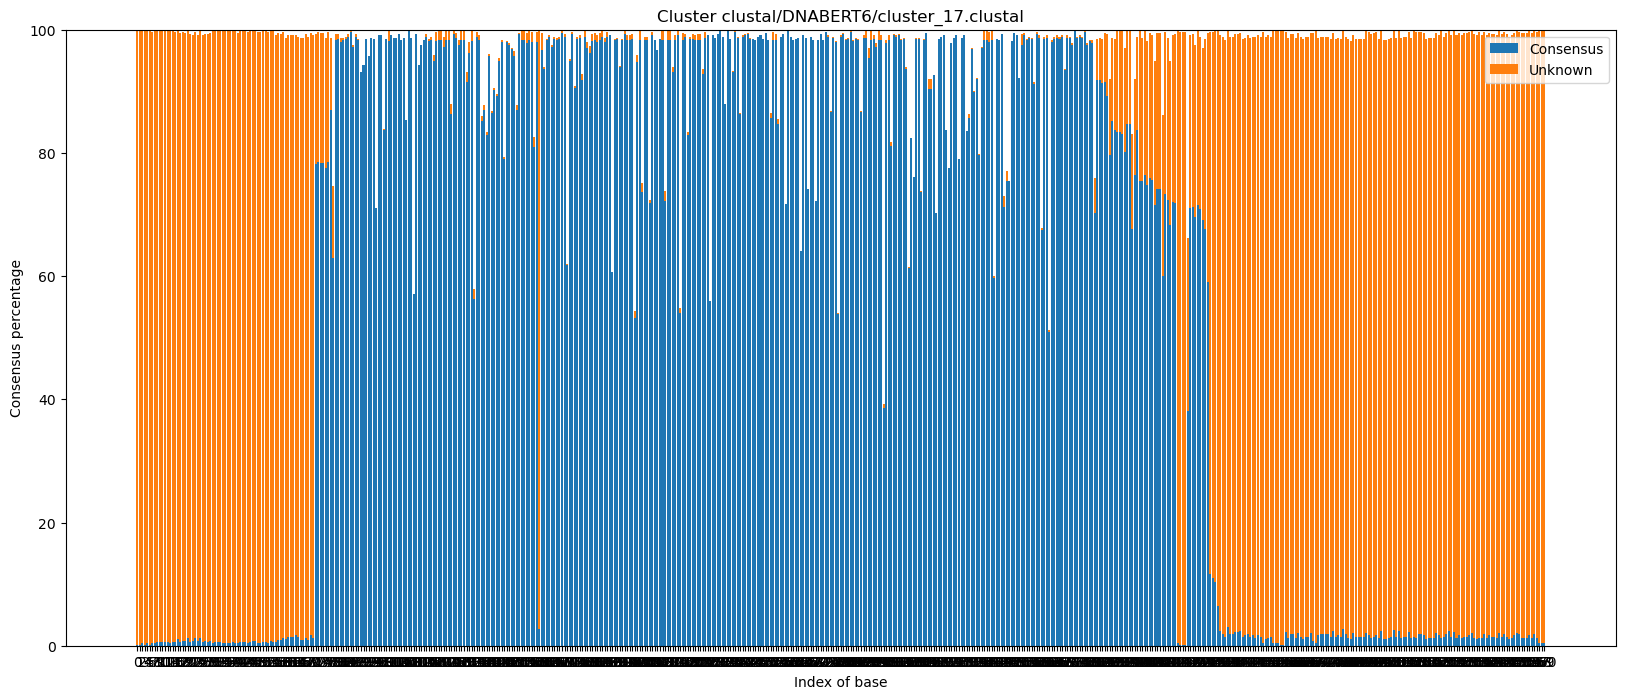

Plot for cluster 18


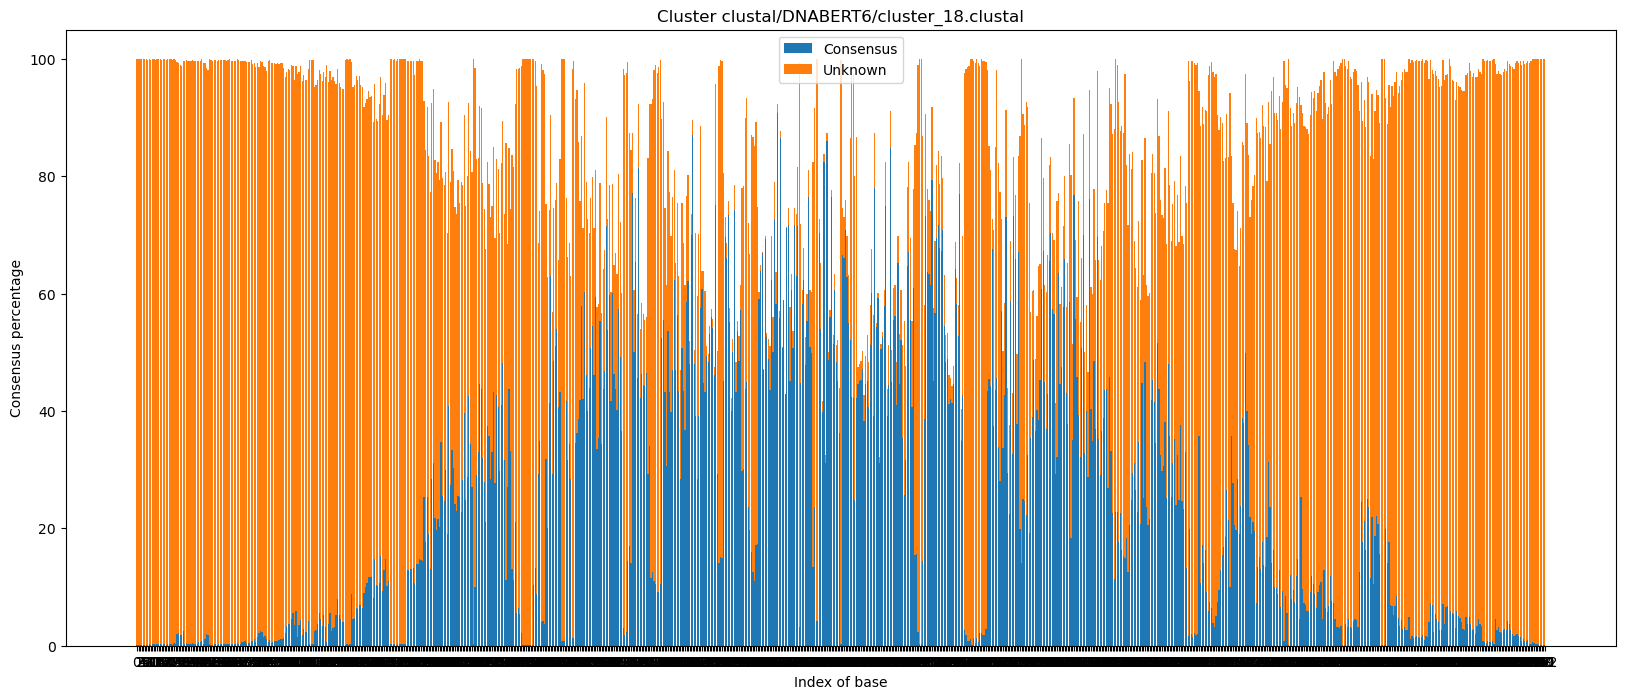

Plot for cluster 19


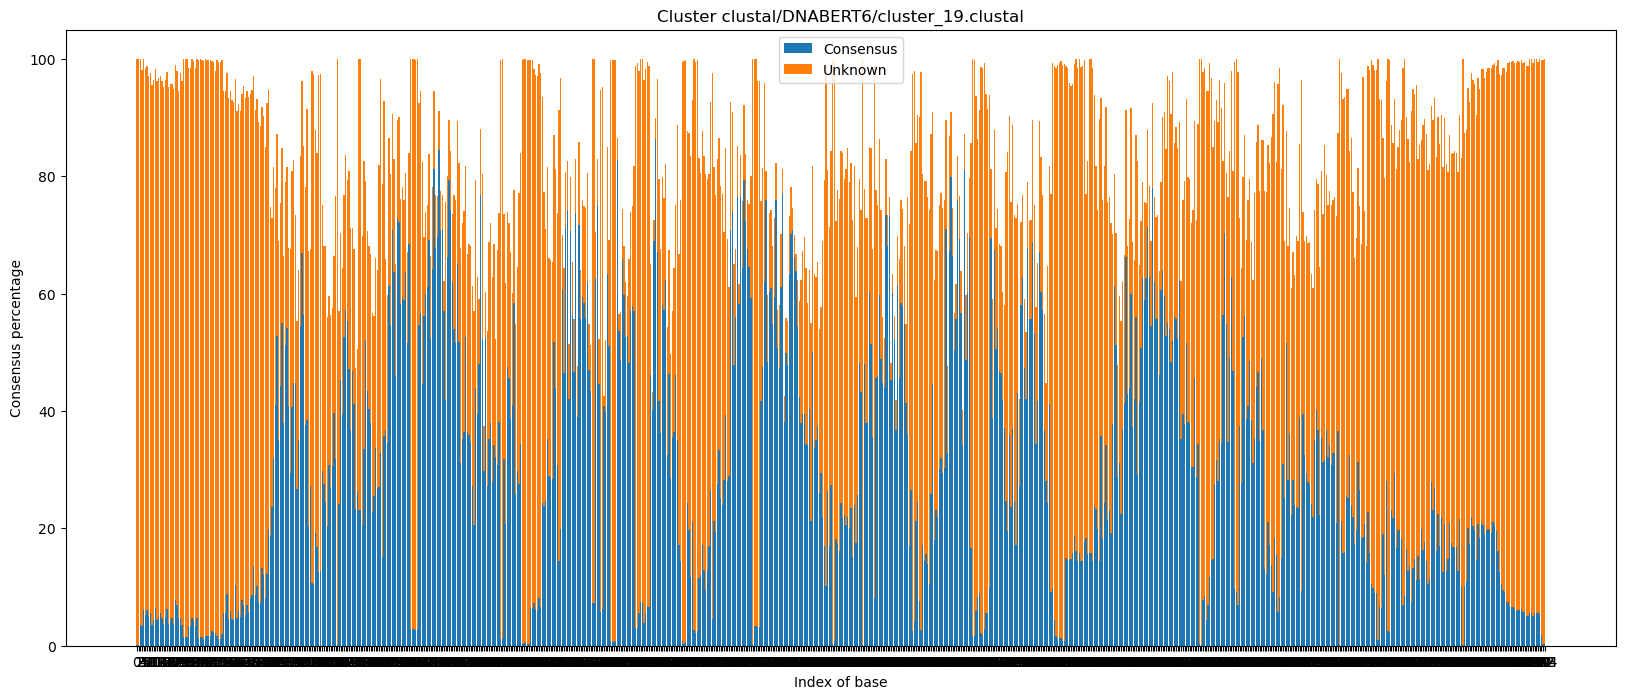

Plot for cluster 20


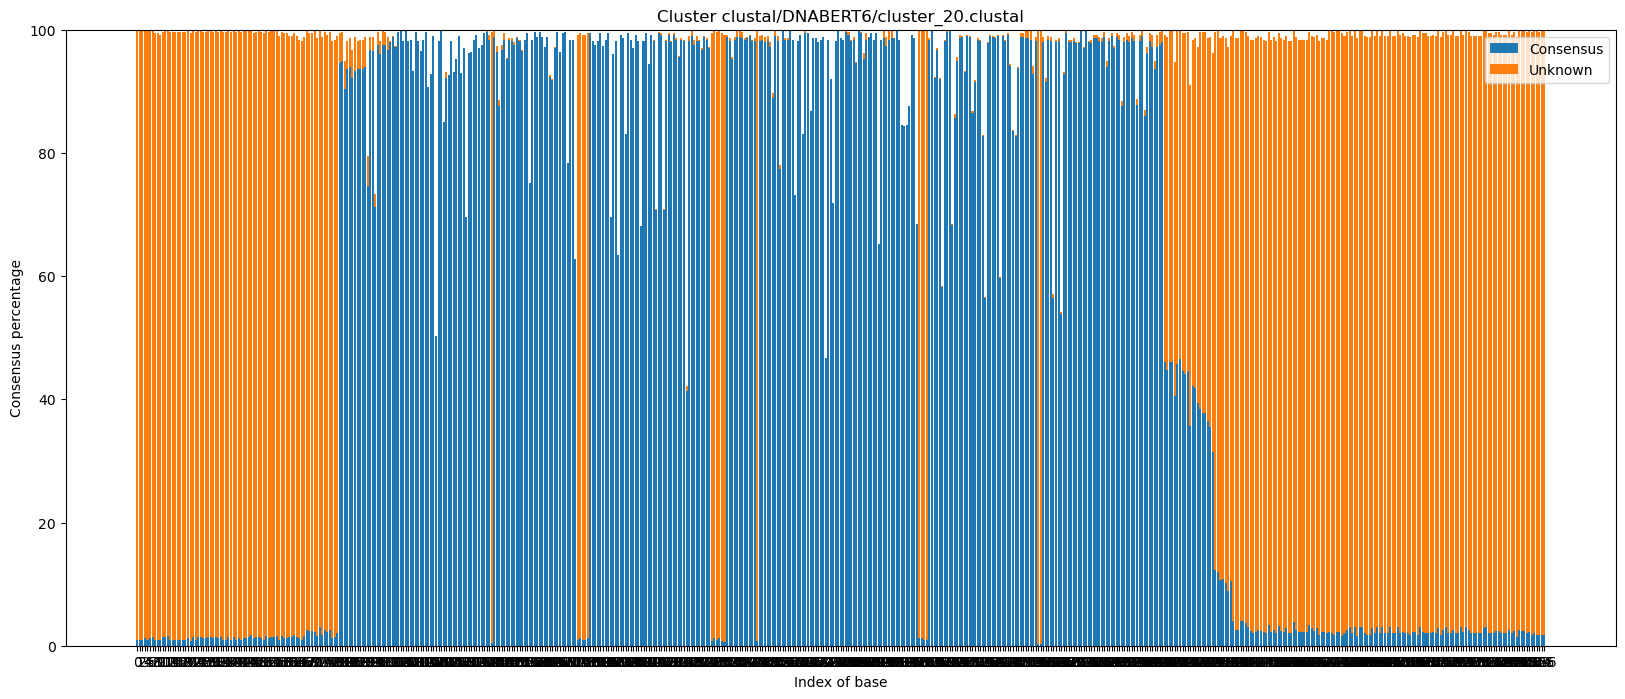

Plot for cluster 21


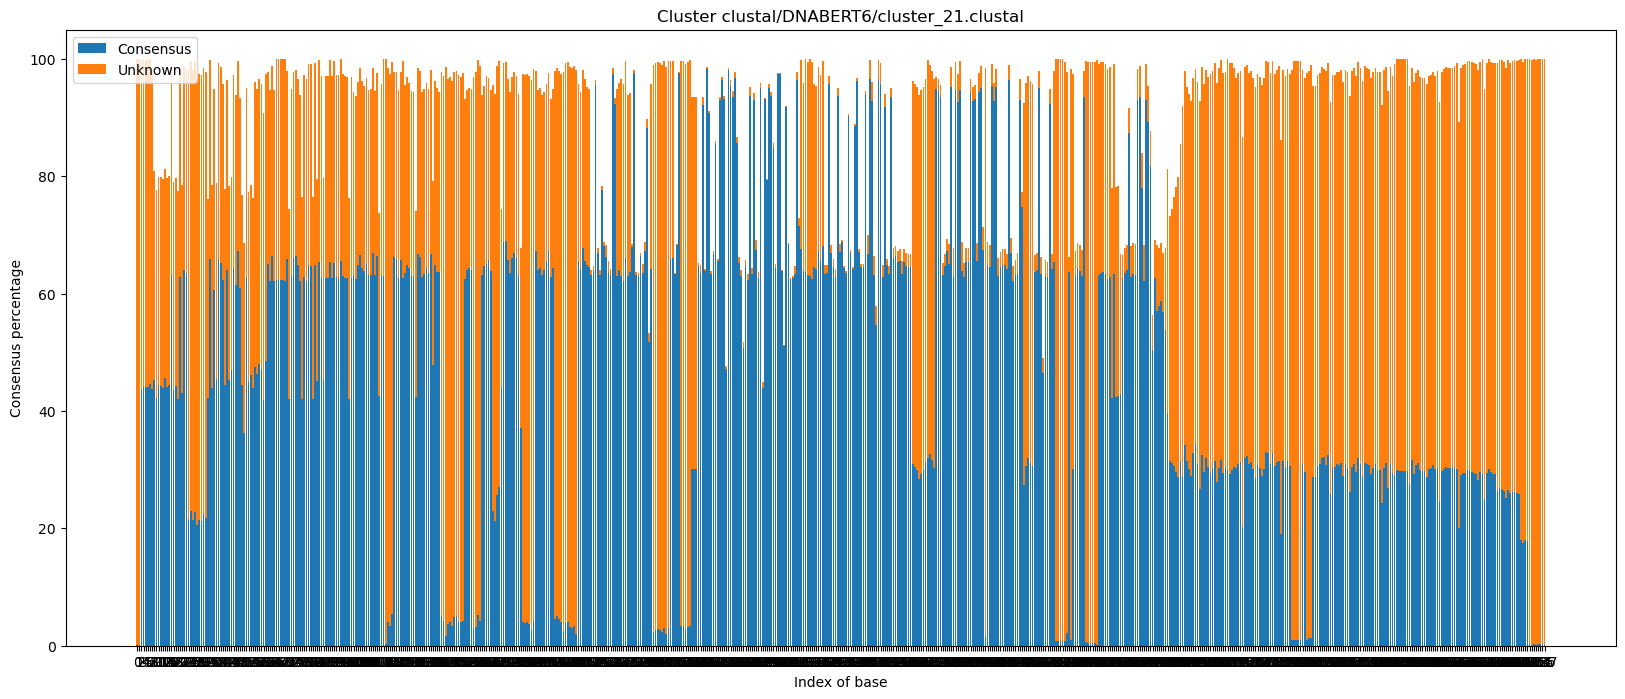

Plot for cluster 22


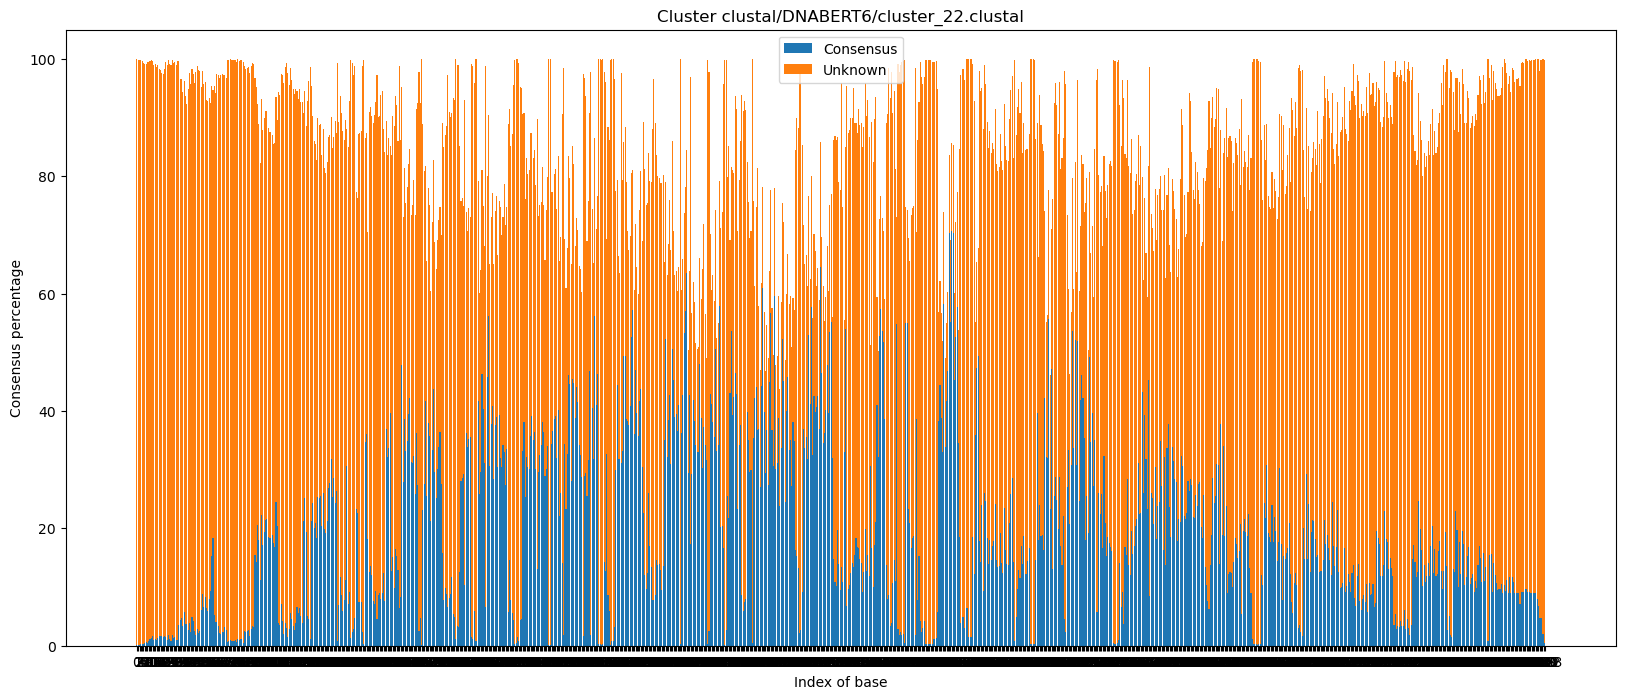

Plot for cluster 23


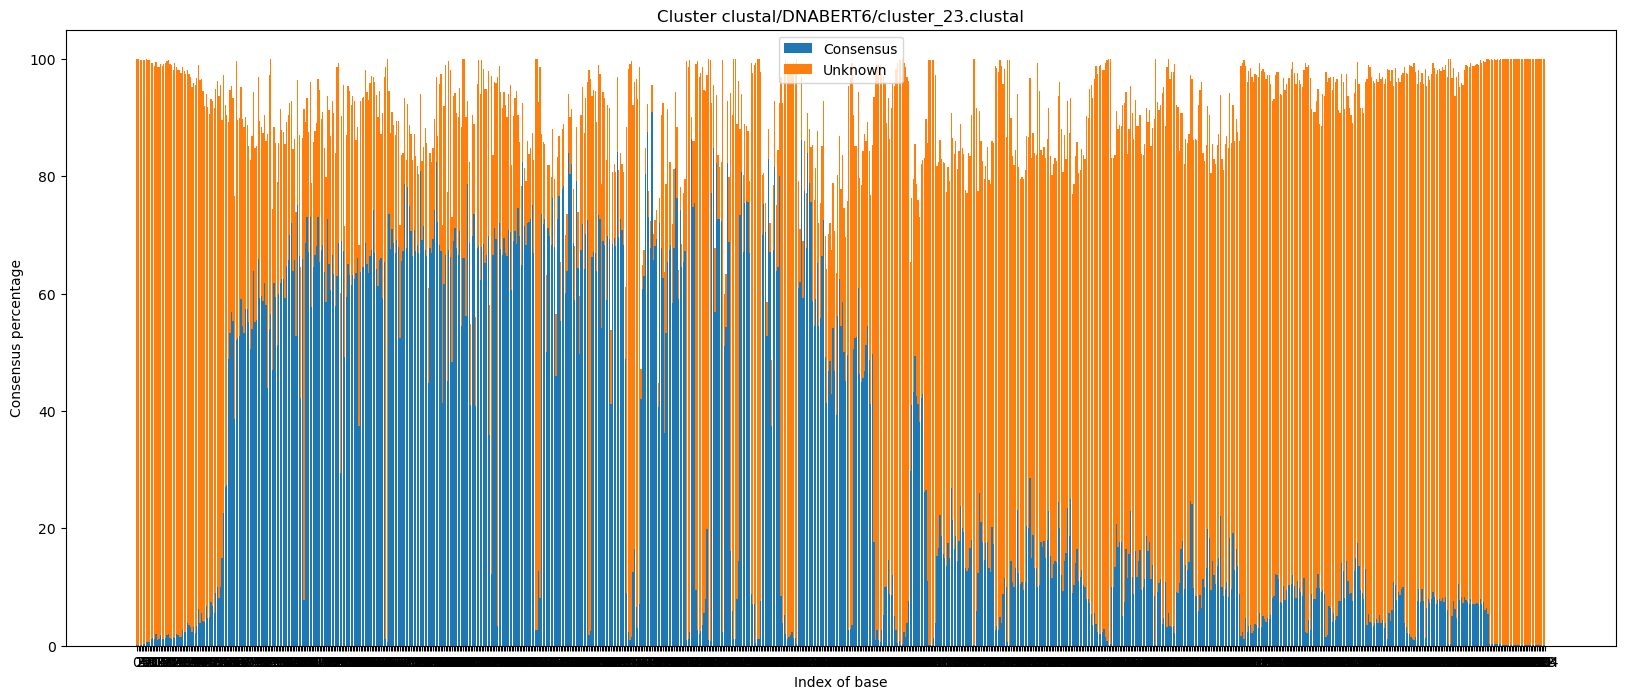

Plot for cluster 24


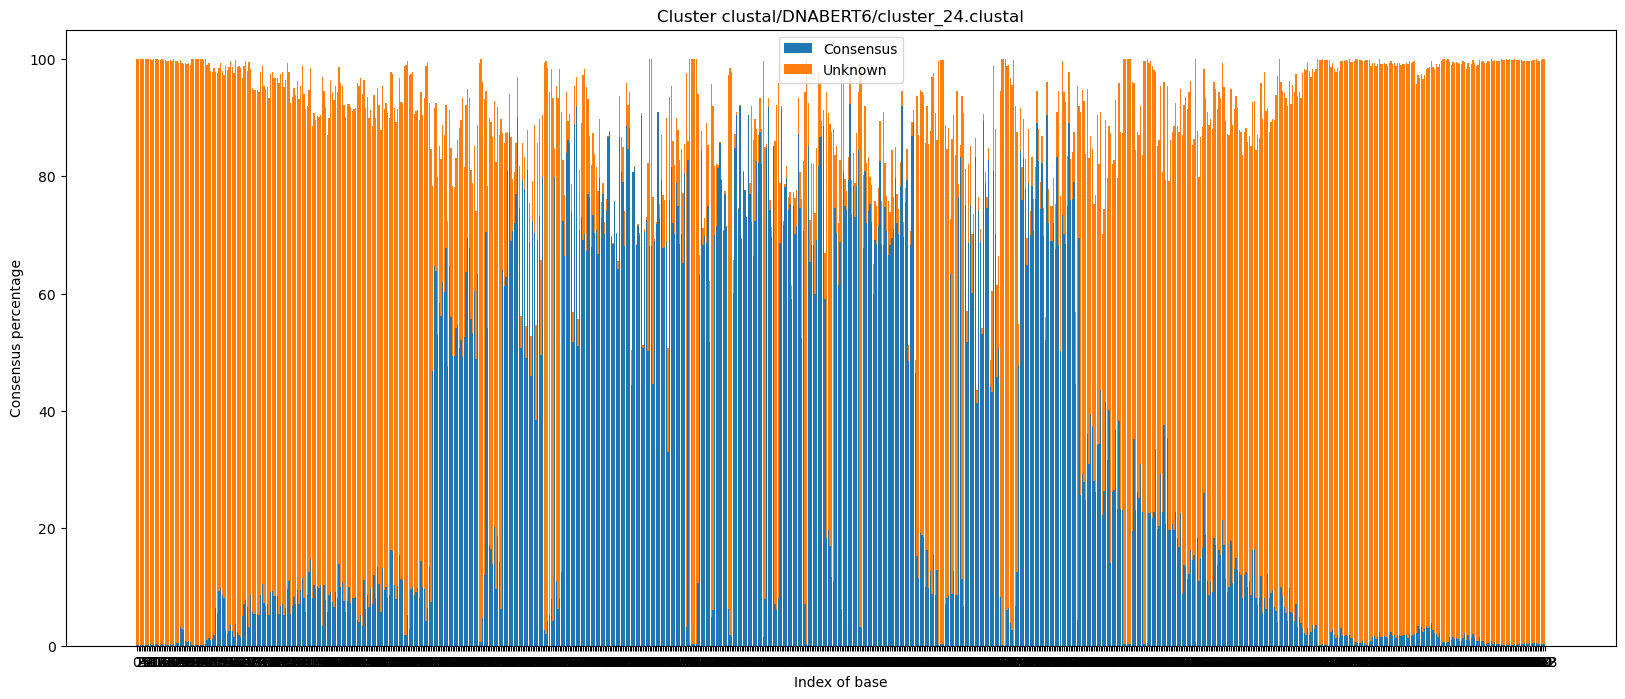

Plot for cluster 25


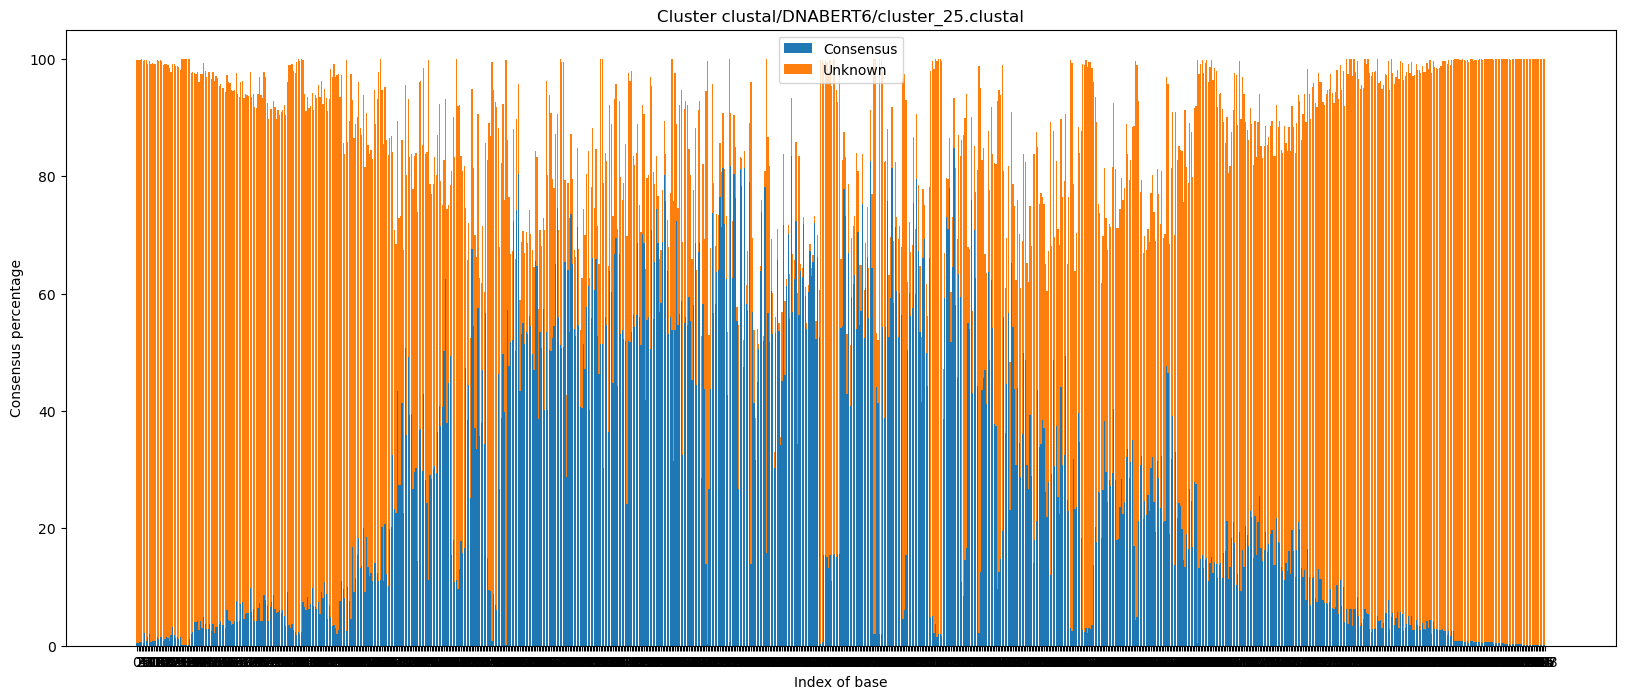

Plot for cluster 26


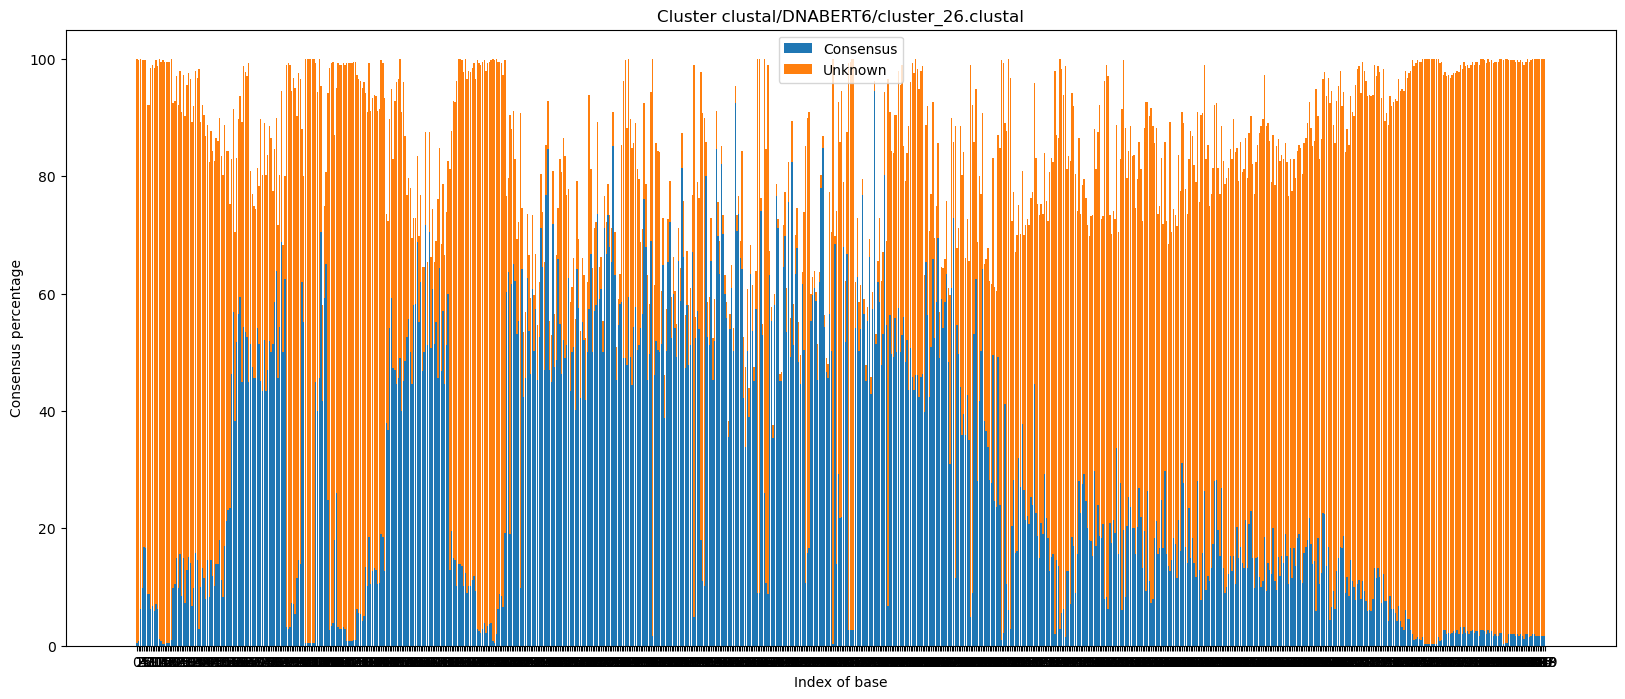

Plot for cluster 27


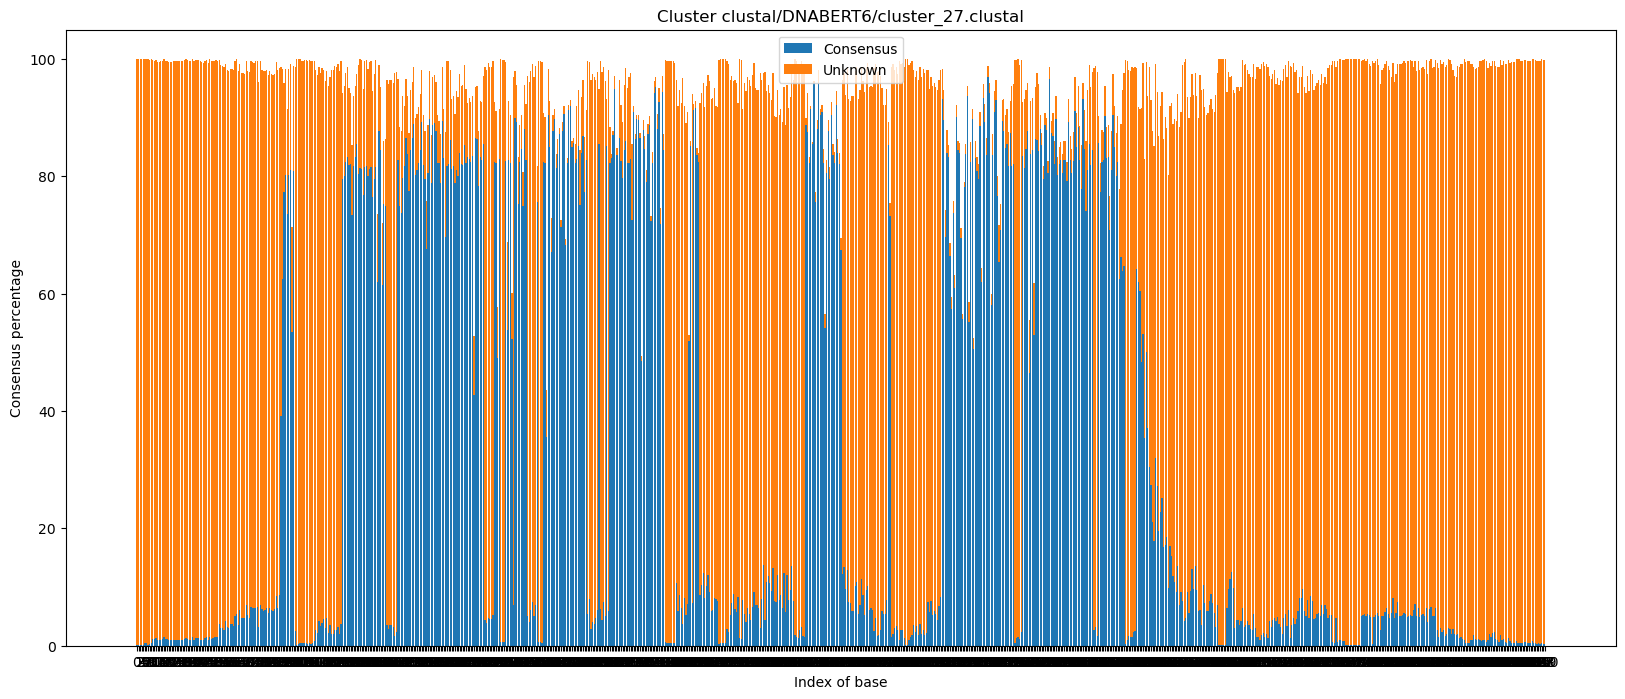

Plot for cluster 28


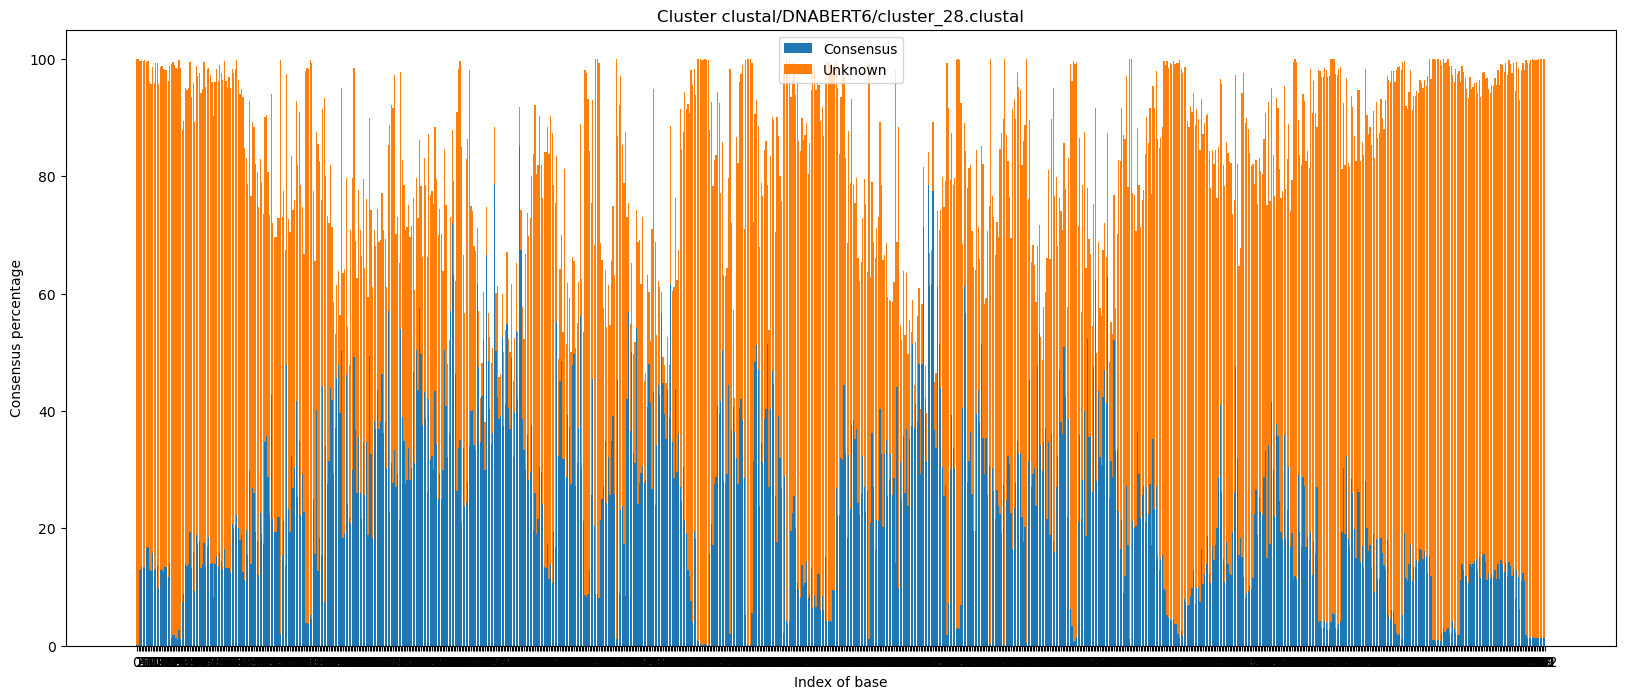

Plot for cluster 29


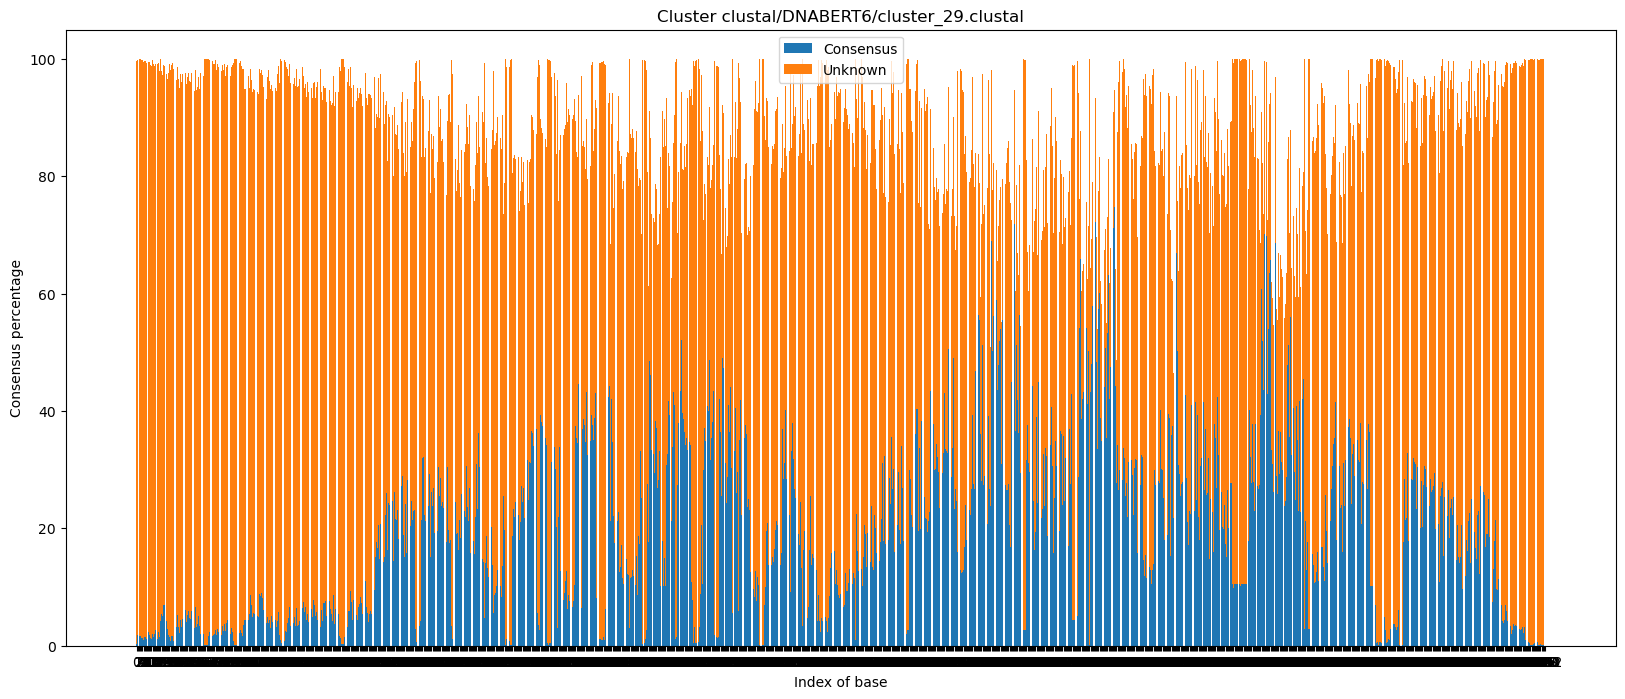

Plot for cluster 30


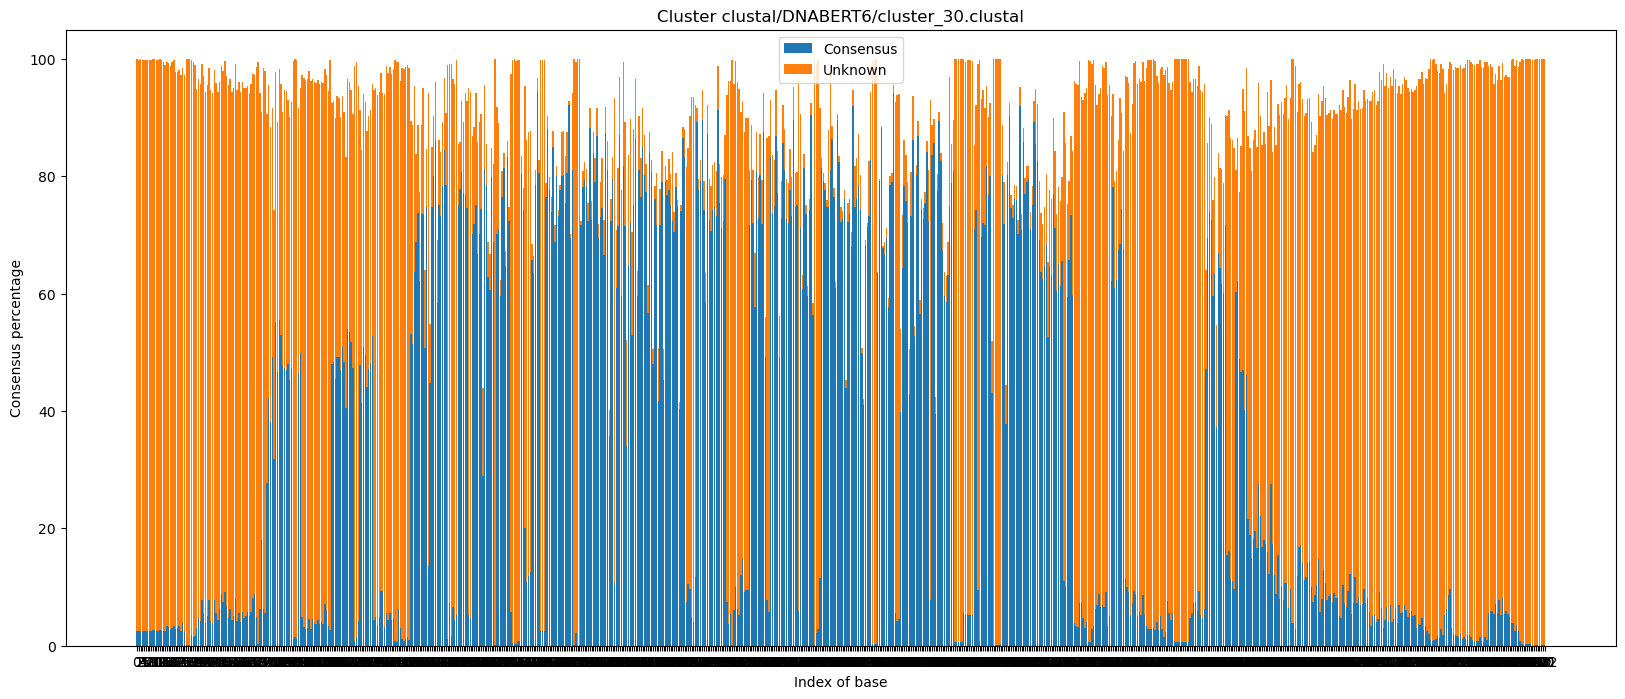

Plot for cluster 31


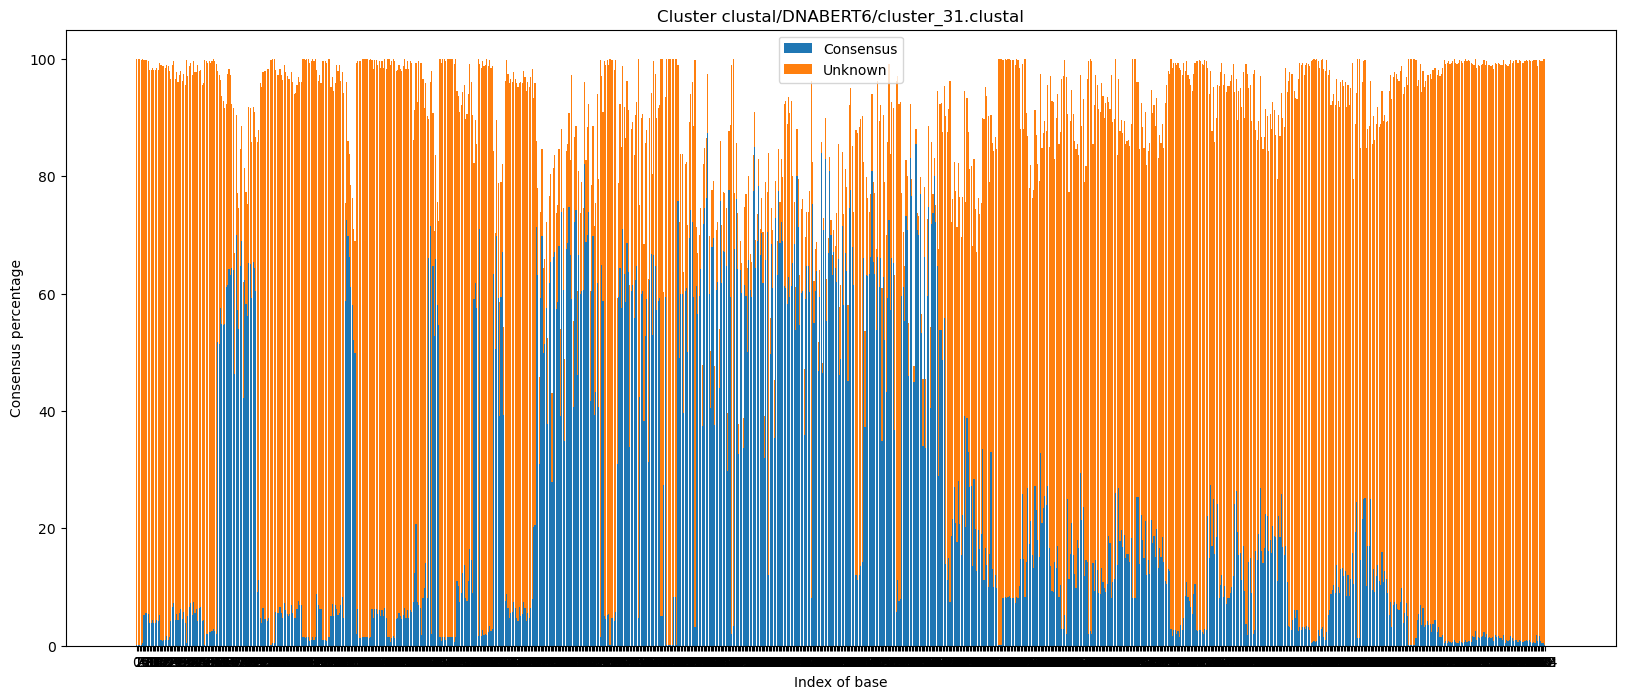

Plot for cluster 32


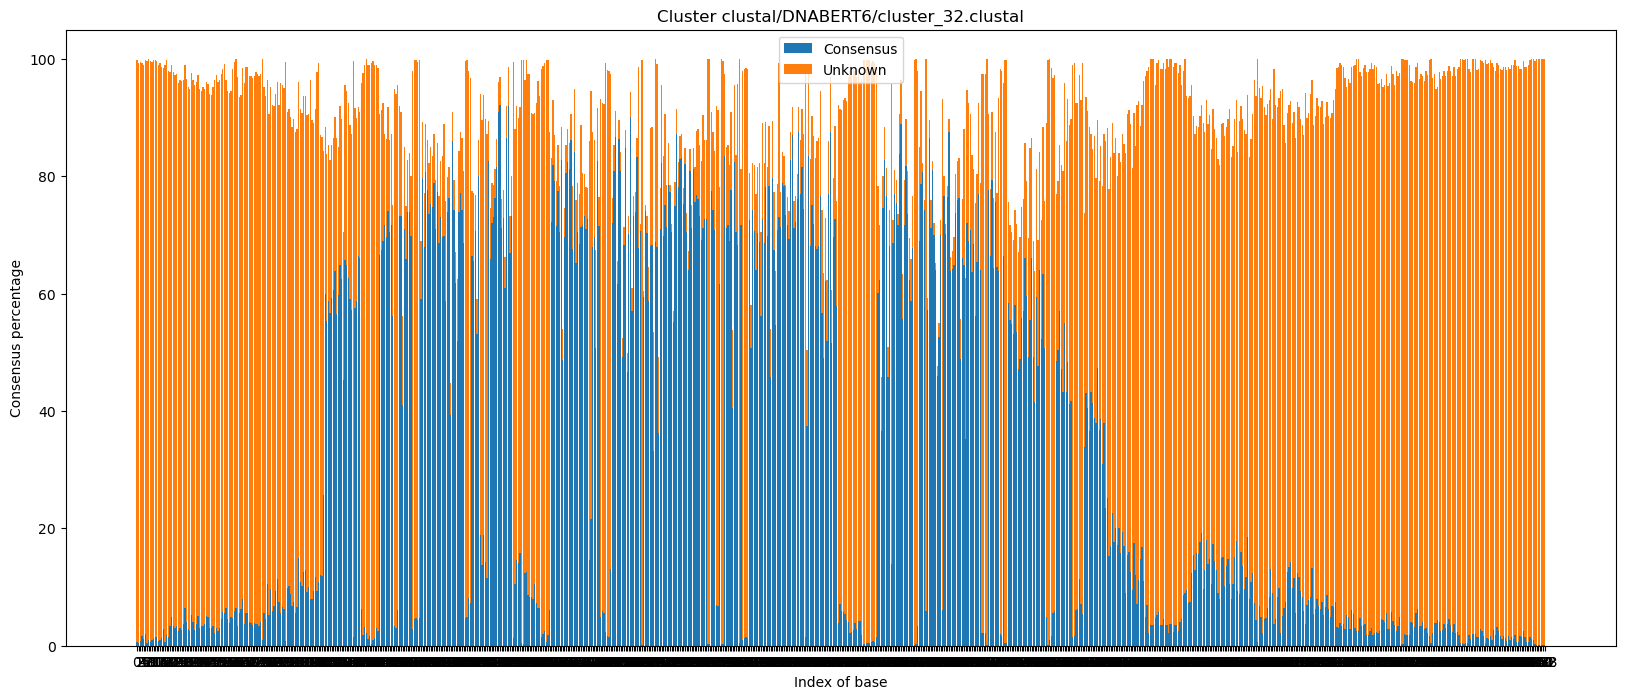

Plot for cluster 33


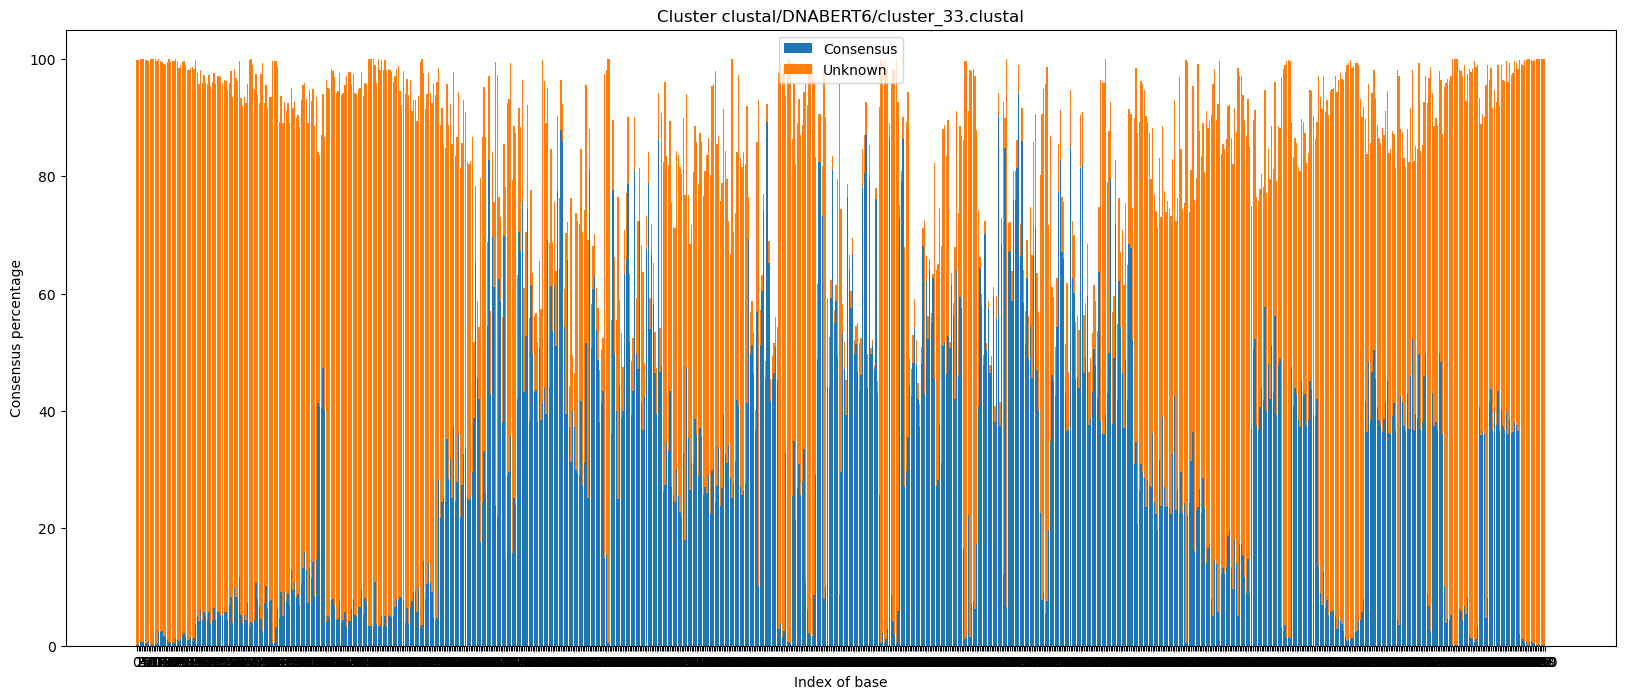

Plot for cluster 34


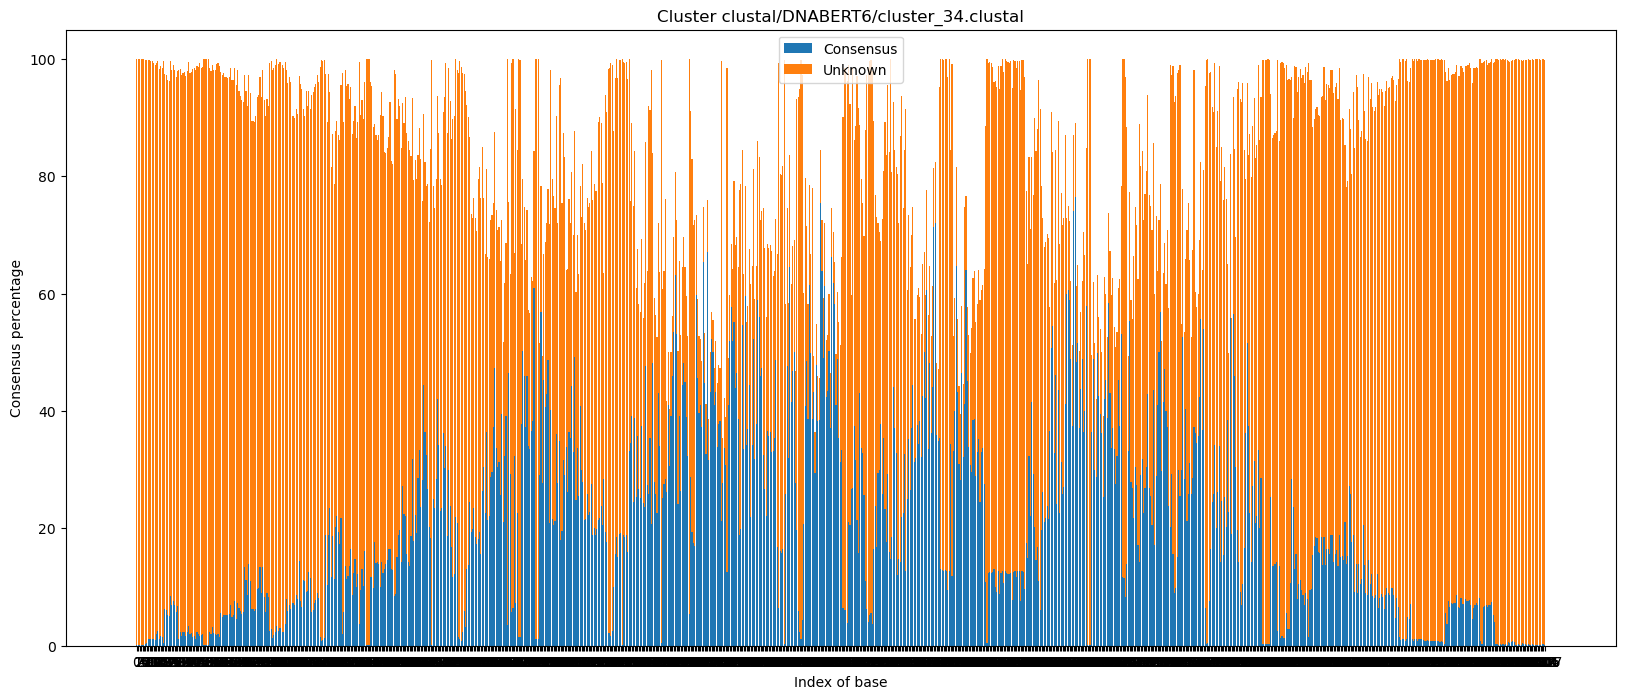

Plot for cluster 35


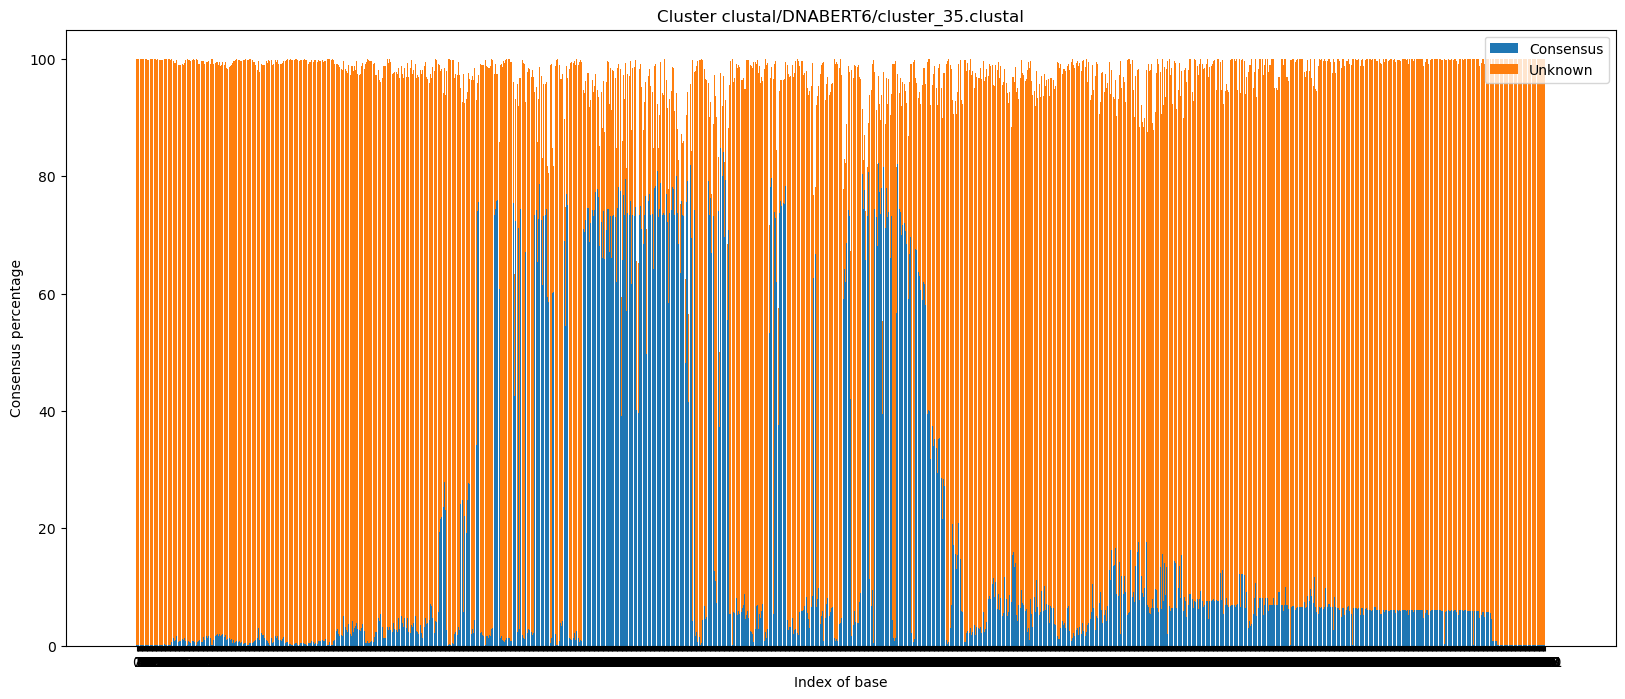

Plot for cluster 36


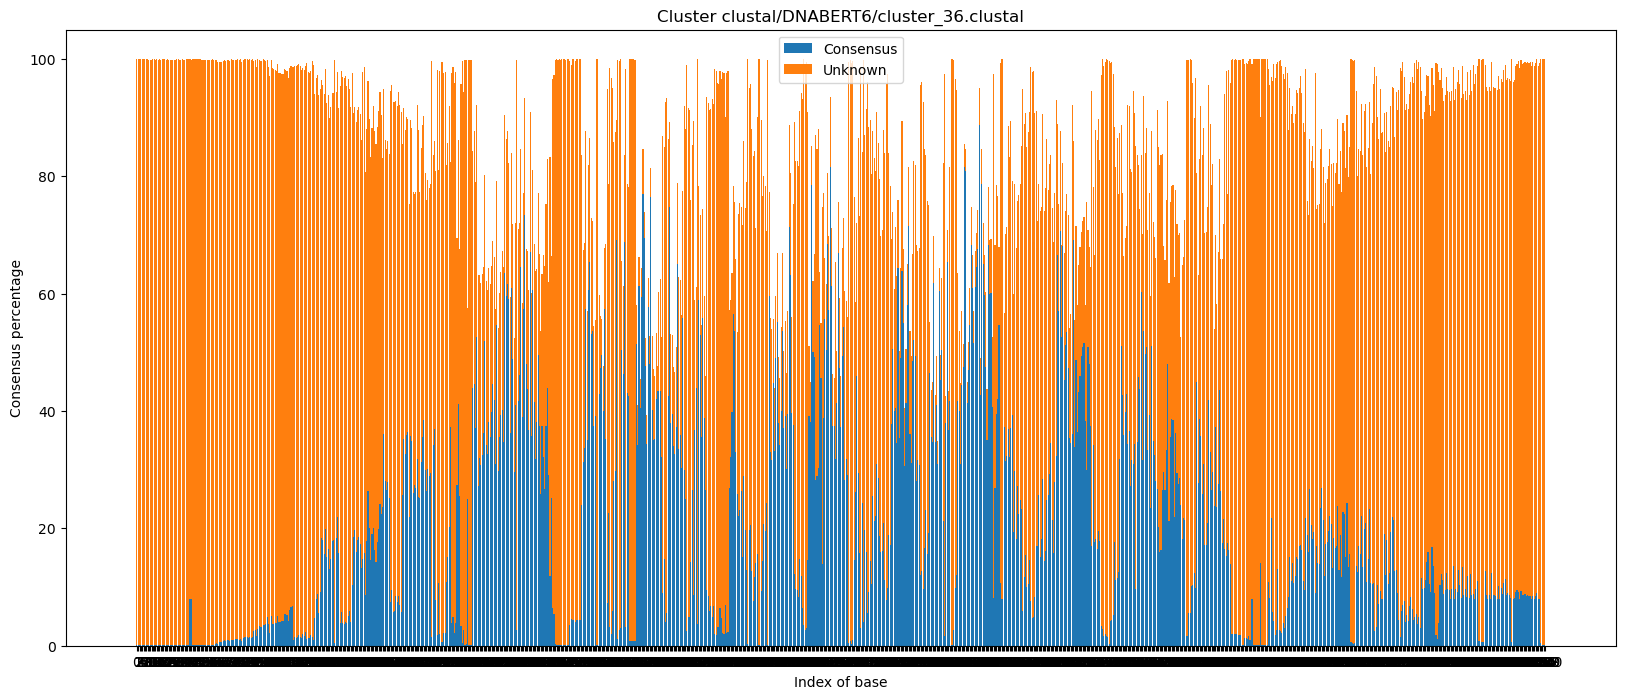

Plot for cluster 37


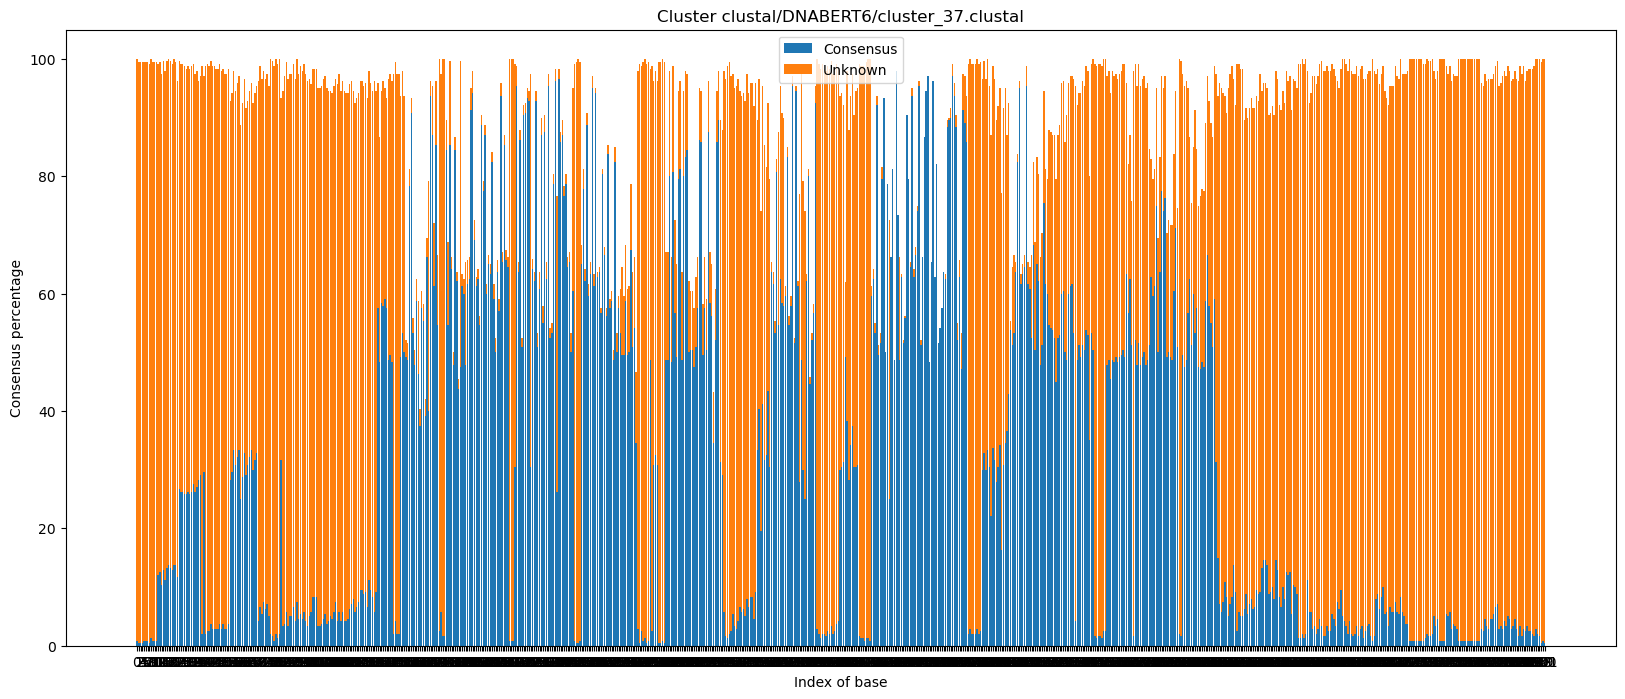

Plot for cluster 38


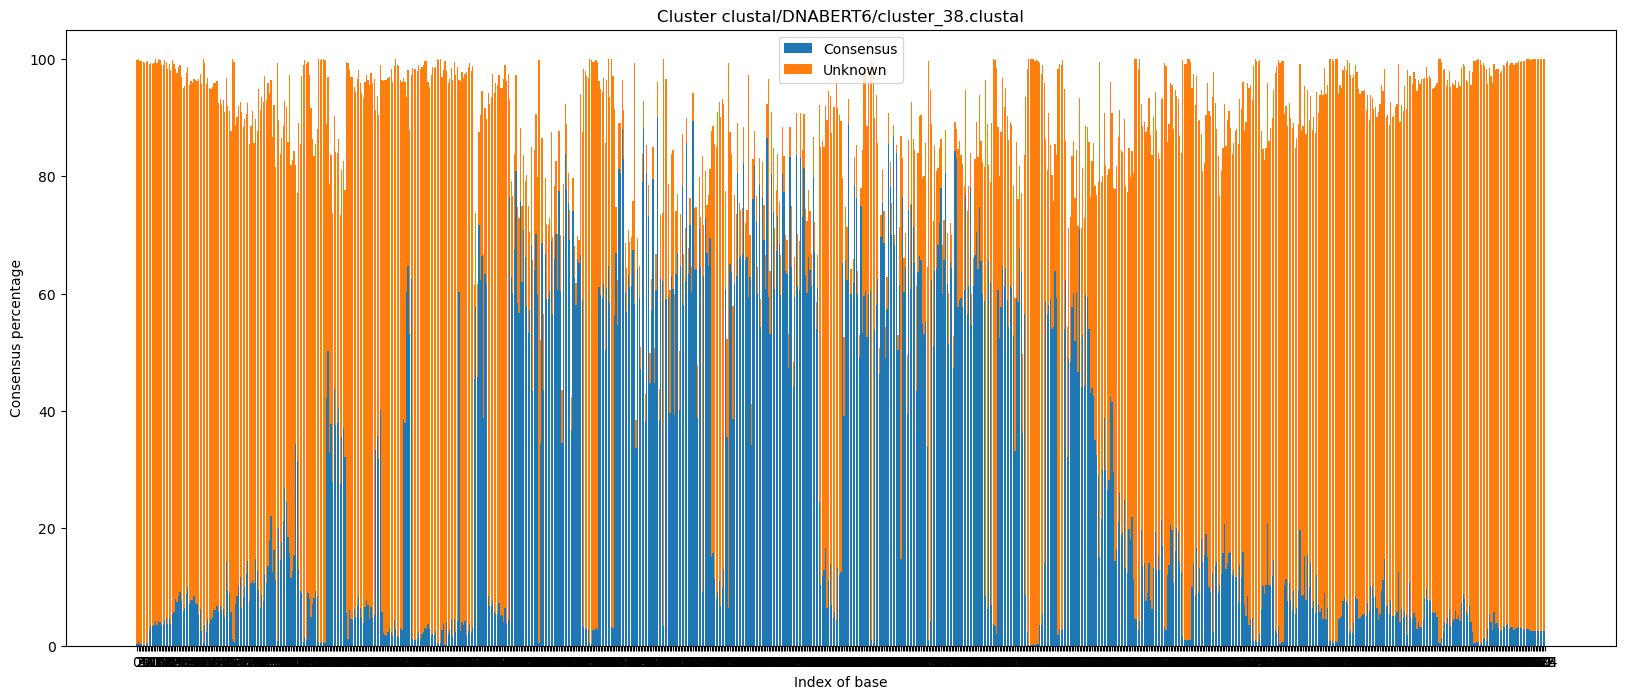

Plot for cluster 39


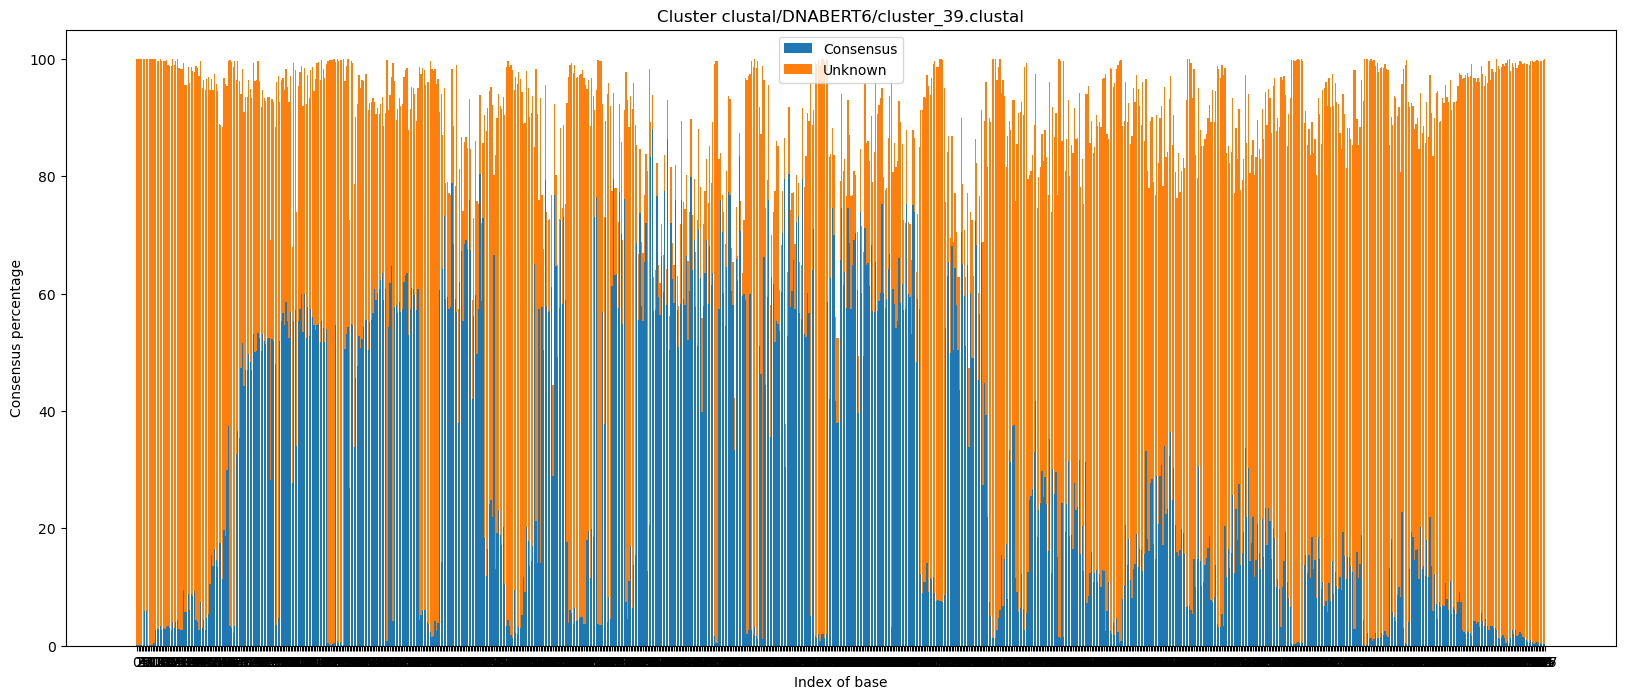

Plot for cluster 40


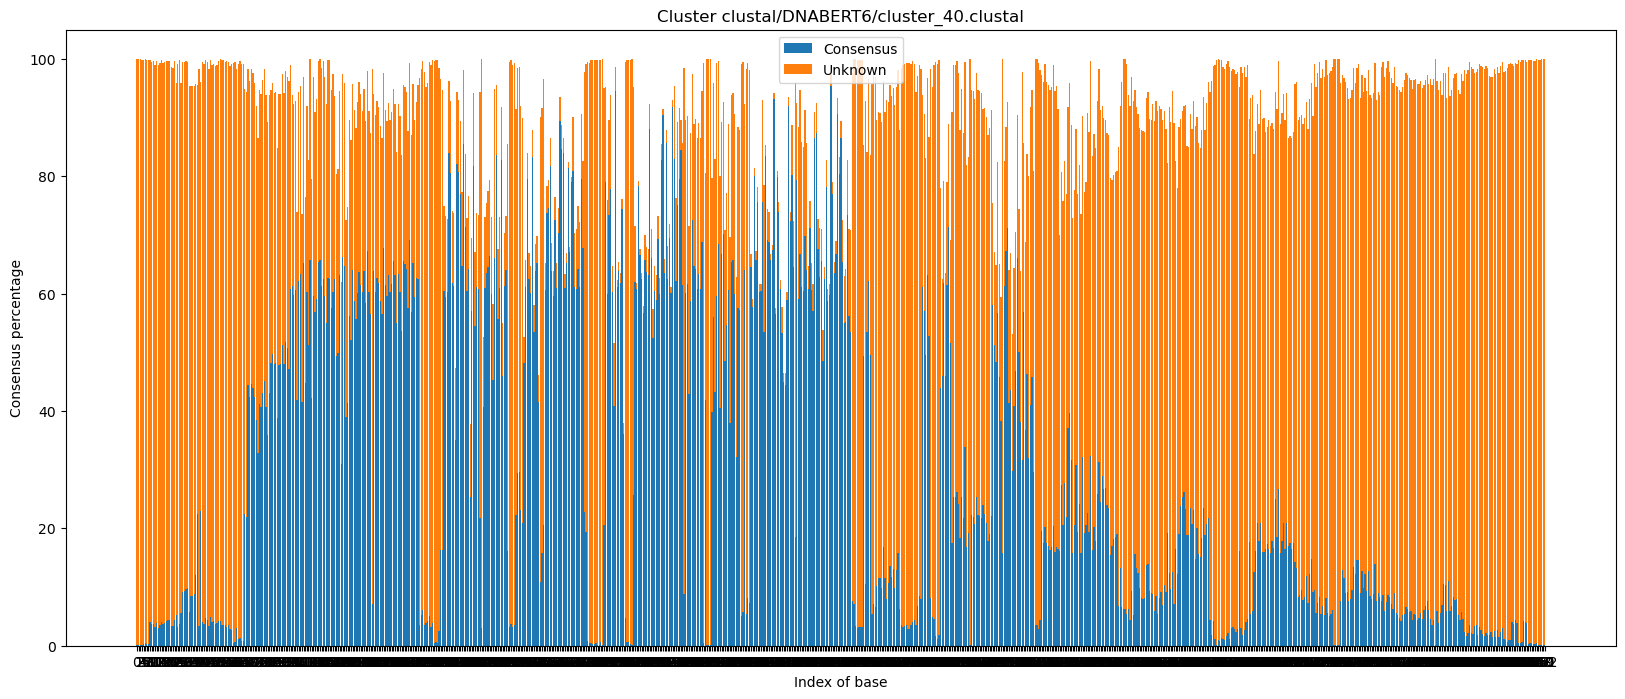

Plot for cluster 41


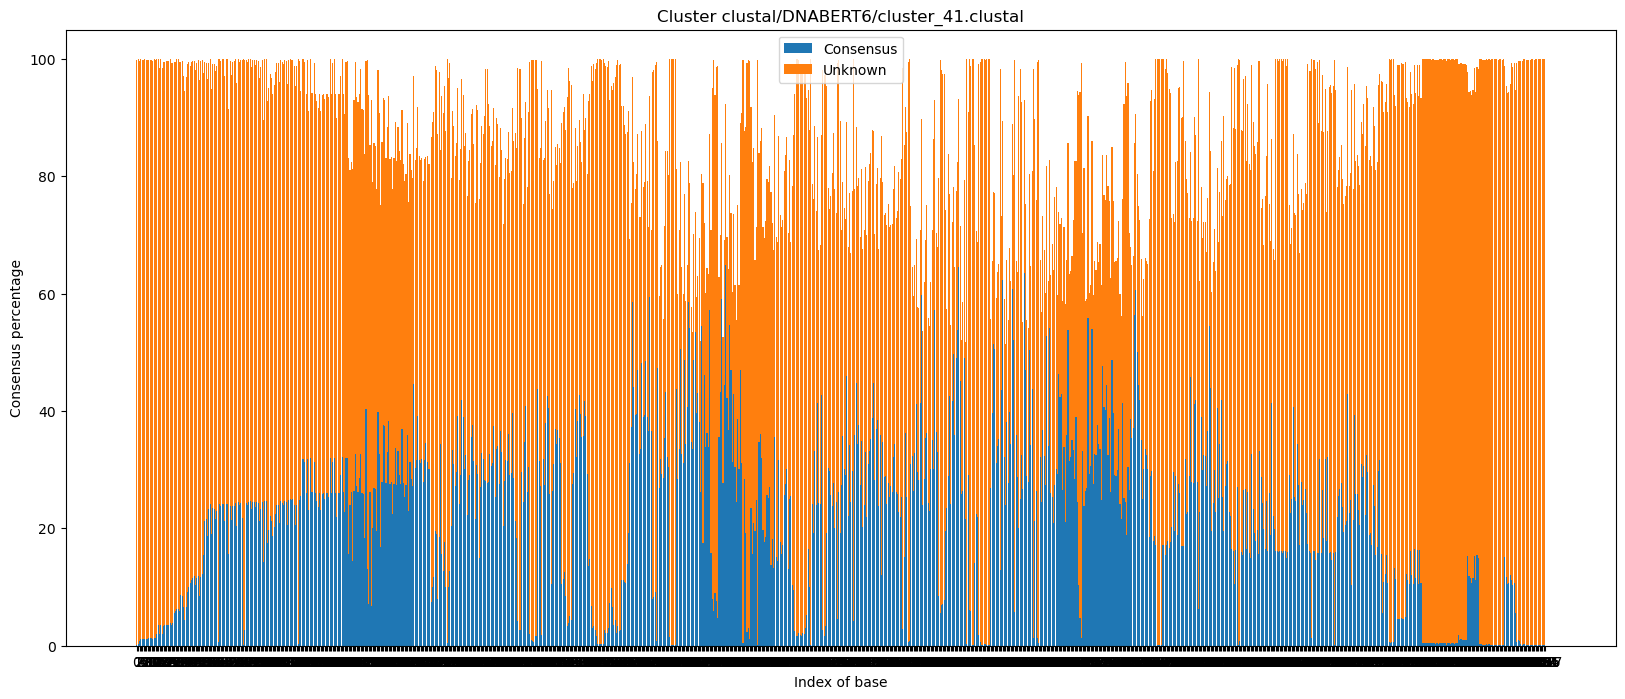

In [31]:
plotClusterRange(architecture_name, 0, num_clusters, unique_labels)

In [23]:
print(np.mean(gap_percentages))
print(np.median(gap_percentages))
print(np.std(gap_percentages))

57.795809966598696
58.73519561426265
8.175670798569785


In [24]:
scores, normalized_scores, sum_scores, div_scores = primerExtractionScoreOnModel(architecture_name, cluster_labels, unique_labels, stride=1, target_consensus=50, window_size=80)

In [25]:
print(scores)
print(normalized_scores)
print(sum_scores)
print(div_scores)

[0, 85.87453874538745, 87.42105263157895, 66.86, 0, 95.18061674008811, 0, 87.28372093023256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 95.94444444444444, 0, 0, 94.74698795180723, 76.97627118644068, 0, 66.81534772182255, 74.13366960907945, 0, 0, 82.03896103896105, 0, 0, 70.72868217054263, 0, 69.91764705882352, 0, 0, 72.625, 0, 72.16666666666667, 67.75510204081633, 0, 67.84461538461538, 0]
[0.      1.1636  2.6576  1.0029  0.      0.54015 0.      1.8766  0.
 0.      0.      0.      0.      0.      0.      0.      0.      1.29525
 0.      0.      1.1796  1.1354  0.      1.3931  1.4697  0.      0.
 1.57925 0.      0.      1.5967  0.      1.48575 0.      0.      1.88825
 0.      0.433   0.996   0.      2.20495 0.     ]
23.8978
0.5689952380952381


In [26]:
np.count_nonzero(normalized_scores)/len(unique_labels)

0.40476190476190477

In [27]:
sequences_list = list(SeqIO.parse("Data/rbcL.fasta" , "fasta"))
family_count_per_cluster, family_frequencies_per_cluster = getFamiliesPerCluster(cluster_labels, unique_labels, getIDs("Data/rbcL_ids.txt"), getIDFamilyMapping(sequences_list))

In [28]:
print(family_count_per_cluster)
print(family_frequencies_per_cluster)

{0: 1541, 1: 439, 2: 896, 3: 489, 4: 645, 5: 204, 6: 1010, 7: 683, 8: 423, 9: 570, 10: 1803, 11: 657, 12: 923, 13: 1089, 14: 772, 15: 908, 16: 1511, 17: 439, 18: 618, 19: 626, 20: 405, 21: 486, 22: 839, 23: 647, 24: 628, 25: 798, 26: 351, 27: 603, 28: 554, 29: 760, 30: 719, 31: 408, 32: 664, 33: 596, 34: 654, 35: 786, 36: 889, 37: 215, 38: 509, 39: 599, 40: 974, 41: 846}
{0: {'exacoides': 1, 'canariensis': 3, 'uralensis': 1, 'carajasensis': 2, 'helveticum': 1, 'rubra': 3, 'megapotamia': 1, 'calycina': 2, 'auricula': 23, 'langsdorffii': 1, 'apodanthera': 1, 'glandibracteolata': 1, 'cyrtophyllum': 1, 'roxburghii': 1, 'europaea': 2, 'yunnanensis': 7, 'hispida': 2, 'epunctulata': 1, 'tanastylum': 1, 'cervaria': 1, 'somnifera': 2, 'coalita': 1, 'jiulongensis': 3, 'sp.': 124, 'scandens': 4, 'ebulus': 1, 'hassleriana': 1, 'subspinosa': 2, 'obovata': 1, 'foliatum': 2, 'stipulacea': 1, 'pseudomagnibracteata': 1, 'hendrikii': 1, 'remotifolia': 1, 'kollimalayanum': 1, 'domestica': 2, 'crassiramea